# Sprint 2: Data Modeling

Author: Mina Roohnavazfar

Date: August 18, 2023

### Introduction

Bike sharing systems have emerged as a new generation of transportation services, offering convenient and automated rental processes. These systems allow users to easily rent bikes from one location and return them to another, providing flexibility and accessibility for urban commuters and tourists alike. Bike-sharing rental process is highly correlated to the environmental and seasonal settings. For instance, weather conditions, precipitation, day of week, season, hour of the day, etc. can affect the rental behaviors. 

These systems have gained immense popularity due to their convenience and accessibility. With the entire process, from membership to rental and return, being automated, users can effortlessly rent bikes from one location and return them at another. Currently, there are more than 500 bike-sharing programs worldwide, featuring over 500,000 bicycles. These systems have become crucial players in addressing traffic, environmental, and health concerns.

My project aims to forecast the number of bike rentals for the years 2011 and 2012 in Washington D.C., USA. The avaiable dataset also includes crucial weather and seasonal information, as these factors play a significant role in bike-sharing rental behaviors. Weather information for the dataset is sourced from https://www.freemeteo.com , ensuring that relevant environmental conditions are taken into account during the analysis.

In previous notebook (sprint1_EDA.ipynb), we explored and performed Exploratory Data Analysis (EDA) to uncover valuable insights from the data, identify patterns, correlations, and interesting trends. 

In this Jupyter Notebook, we will expand our previous work and delve into the Modeling phase. Our project involves two distinct approaches:

**First Approach:** we treat 'cnt' as the target variable and endeavor to predict its value based on the other independent variables. Here, 'cnt' serves as the comprehensive outcome we aim to forecast.

**Second Approach:** It involves developing two separate models, each associated with 'casual' and 'registered' users. We then sum up the predictions from these models to compute the total count and compare woth 'cnt' variable. This method grants us deeper insights into the dataset, allowing us to comprehend the respective contributions of 'casual' and 'registered' users to the overall 'cnt' variable.

Considering the dataset's characteristics, we are planning to employ Regression models (Linear and Non Linear Regression), Neural Network, and Decision Tree for predicting our target variables. The forthcoming stages of our project will involve refining these models and leveraging their predictive capabilities.

As we proceed with the development of our baseline models, we establish a robust model evaluation framework that aligns with the practical application of our models. This framework will enable us to assess the performance of our models accurately and make informed decisions regarding their robustness for the real-world scenarios. To achieve this, we will consider different evaluation metrics as **Percentage Mean Absolute Error (PMAE) and Percentage Root Mean Squared Error (PRMSE), R-squared, and adj-R-squared**. Moreover, employing k-fold cross-validation will help us assess the generalization performance of our models. In addition, for our four proposed approaches, we will compare their performance against each other and our chosen evaluation metrics across the three target variables. This comparison will help us identify which approach offers superior predictive capabilities in this project.


### Data Dictionary

Our dataset (data.csv) includes the following fields:

| Features | Description |
|:------------|:------------|
| instant     | Record index |
| dteday      | Date |
| season      | Season (1:springer, 2:summer, 3:fall, 4:winter) |
| yr          | Year (0: 2011, 1:2012) |
| mnth        | Month (1 to 12) |
| hr          | Hour (0 to 23) |
| holiday     | Whether day is holiday or not |
| weekday     | Day of the week |
| workingday  | If day is neither weekend nor holiday is 1, otherwise is 0. |
| weathersit  | Weather situation:<br>1: Clear, Few clouds, Partly cloudy, Partly cloudy<br>2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds<br>4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog |
| temp        | Normalized temperature in Celsius (values divided by 41) |
| atemp       | Normalized feeling temperature in Celsius (values divided by 50) |
| hum         | Normalized humidity (values divided by 100) |
| windspeed   | Normalized wind speed (values divided by 67) |


| Target Variables | Description |
|:------------|:------------|
| casual      | Count of casual users rentals |
| registered  | Count of registered users rentals |
| cnt         | Total count of bike rentals for both casual and registered users|

### Table of contents
* Part 1: Data Exploration
* Part 2: EDA
* Part 3: Statistical Analysis
* Part 4: Preprocessing Data for Modeling
* Part 5: Modeling Total Count Target Variable
  * 5-1: Linear Regression on y_t
  * 5-2: Non Linear Regression on y_t
  * 5-3: Neural Network on y_t
  * 5-4: Decision Tree Regressoin on y_t
* Part 6: Modeling Casual Users Rentals as Target Variable
  * 6-1: Linear Regression on y_c
  * 6-2: Non Linear Regression on y_c
  * 6-3: Neural Network on y_c
  * 6-4: Decision Tree Regressoin on y_c
* Part 7: Modeling Registered Users Rentals as Target Variable
  * 7-1: Linear Regression on y_r
  * 7-2: Non Linear Regression on y_r
  * 7-3: Neural Network on y_r
  * 7-4: Decision Tree Regressoin on y_r
* Part 8: Recap
  * 8-1: Insights on EDA
  * 8-2: Insights on Modeling

### Part 1: Data Exploration

In [62]:
# importing required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import statsmodels.api as sm
from statsmodels.api import tsa # time series analysis

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor

from tensorflow.keras.metrics import MeanAbsoluteError
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score

from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import GridSearchCV

%matplotlib inline
#plt.style.use('ggplot') # applying the 'ggplot' style to the plots

# filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# read data from the CSV file:
df=pd.read_csv('C:/Users/HP/Desktop/brainstation/projects/Capstone/Sprint 2/data.csv')

In [3]:
# sanity checks with the columns and the first 5 rows:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [5]:
# remove the column 'instant' as it is just an index of cases.
df = df.drop(['instant'], axis=1)

In [6]:
# sanity checks with the first 5 rows after dropping column 'instant':
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [7]:
# sanity checks with the last 5 rows:
df.tail()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17374,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61
17378,2012-12-31,1,1,12,23,0,1,1,1,0.26,0.2727,0.65,0.1343,12,37,49


In [8]:
# sanity checks with a sample of 10 rows:
df.sample(10)

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17058,2012-12-18,4,1,12,13,0,2,1,1,0.50,0.4848,0.42,0.2836,51,235,286
7480,2011-11-13,4,0,11,7,0,0,0,1,0.34,0.3182,0.66,0.2239,13,30,43
3221,2011-05-19,2,0,5,3,0,4,1,1,0.48,0.4697,1.00,0.0000,1,3,4
6029,2011-09-13,3,0,9,19,0,2,1,1,0.68,0.6364,0.69,0.1642,55,341,396
16596,2012-11-29,4,1,11,7,0,4,1,1,0.20,0.2576,0.64,0.0000,8,354,362
2778,2011-04-30,2,0,4,16,0,6,0,1,0.58,0.5455,0.37,0.1940,191,273,464
7528,2011-11-15,4,0,11,7,0,2,1,2,0.54,0.5152,0.68,0.1642,21,298,319
2395,2011-04-14,2,0,4,17,0,4,1,1,0.60,0.6061,0.28,0.0000,50,338,388
640,2011-01-29,1,0,1,23,0,6,0,1,0.16,0.1970,0.80,0.0896,3,30,33
2846,2011-05-03,2,0,5,12,0,2,1,2,0.68,0.6364,0.61,0.4925,48,169,217


In [7]:
# display dimensions of data:
df.shape
print(f'data includes {df.shape[0]} rows and {df.shape[1]} columns.')

data includes 17379 rows and 16 columns.


In [8]:
# summary of mydata:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   dteday      17379 non-null  object 
 1   season      17379 non-null  int64  
 2   yr          17379 non-null  int64  
 3   mnth        17379 non-null  int64  
 4   hr          17379 non-null  int64  
 5   holiday     17379 non-null  int64  
 6   weekday     17379 non-null  int64  
 7   workingday  17379 non-null  int64  
 8   weathersit  17379 non-null  int64  
 9   temp        17379 non-null  float64
 10  atemp       17379 non-null  float64
 11  hum         17379 non-null  float64
 12  windspeed   17379 non-null  float64
 13  casual      17379 non-null  int64  
 14  registered  17379 non-null  int64  
 15  cnt         17379 non-null  int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 2.1+ MB


Finding:
- All the columns have 17379.
- df contains fiftheen numerical columns. All of these columns are integer except for temp, atemp, hum, and windspeed which are Float.
- df contains only one categorical column as dteday. 

In [9]:
# convert 'dteday' column to a pandas DateTime type:
df['dteday']= pd.to_datetime(df['dteday'])
print(df['dteday'].dtype)
df['dteday']

datetime64[ns]


0       2011-01-01
1       2011-01-01
2       2011-01-01
3       2011-01-01
4       2011-01-01
           ...    
17374   2012-12-31
17375   2012-12-31
17376   2012-12-31
17377   2012-12-31
17378   2012-12-31
Name: dteday, Length: 17379, dtype: datetime64[ns]

In [12]:
# check the number of missing values for columns:
df.isna().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing values.

In [13]:
# check the exact duplicates rows:
df.duplicated().sum()

0

There are no duplicate rows.

In [14]:
# check for duplicated columns by transpose
df.T.duplicated() # There is no duplictaed columns in mydata.

dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

There are not exact duplicate columns.

In [10]:
# we can check for mathmatically duplicated columns by correlation
# but we need to look at only numerical data
df_num = df.select_dtypes(include="number")
df_num.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773,0.120206,0.174226,0.178056
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740,0.142779,0.253684,0.250495
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386,0.068457,0.122273,0.120638
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252,0.301202,0.374141,0.394071
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988,0.031564,-0.047345,-0.030927
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502,0.032721,0.021578,0.026900
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830,-0.300942,0.134326,0.030284
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226,-0.152628,-0.120966,-0.142426
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125,0.459616,0.335361,0.404772
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336,0.454080,0.332559,0.400929


<Axes: >

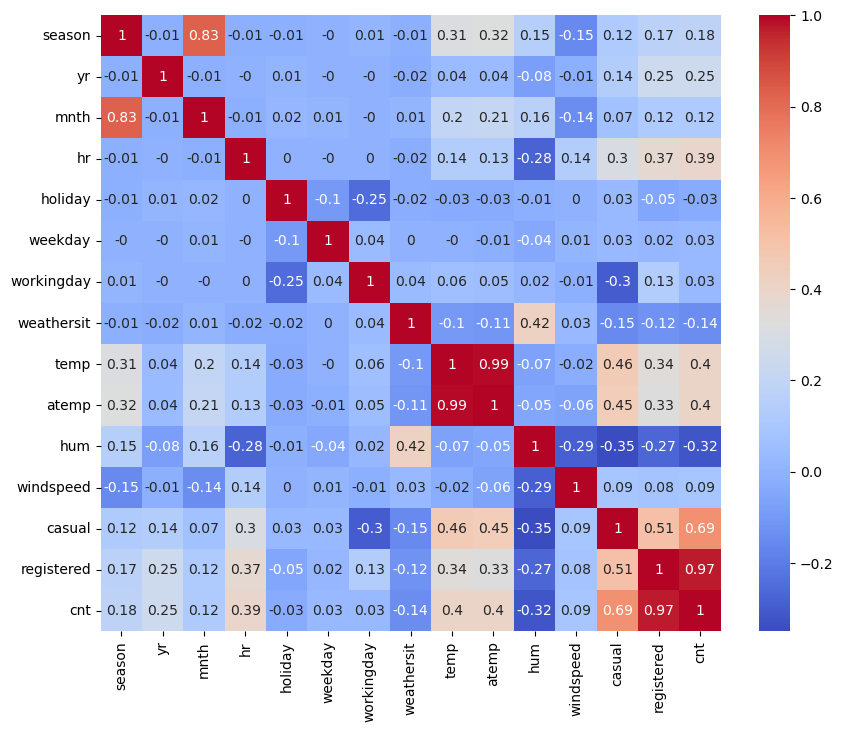

In [11]:
# display the heatmap for correlation matrix:
plt.figure(figsize=(10, 8))
sns.heatmap(round(df_num.corr(),2),cmap='coolwarm',annot=True)

Finding:
- The columns 'month' and 'season' exhibit a strong positive correlation of approximately 0.83.
- As expected, the columns 'registered', 'cnt', and 'casual' show a high positive correlation with each other. This is because the "cnt" values represent the total count of 'casual' and 'registered' rentals.
- 'temp' and 'atemp' are highly correlated because they are both derived from the same underlying weather conditions.

### Part 2: EDA
Here we are going to examine and visualize the dataset to gain insights, identify patterns, and understand the structure and characteristics of the data.

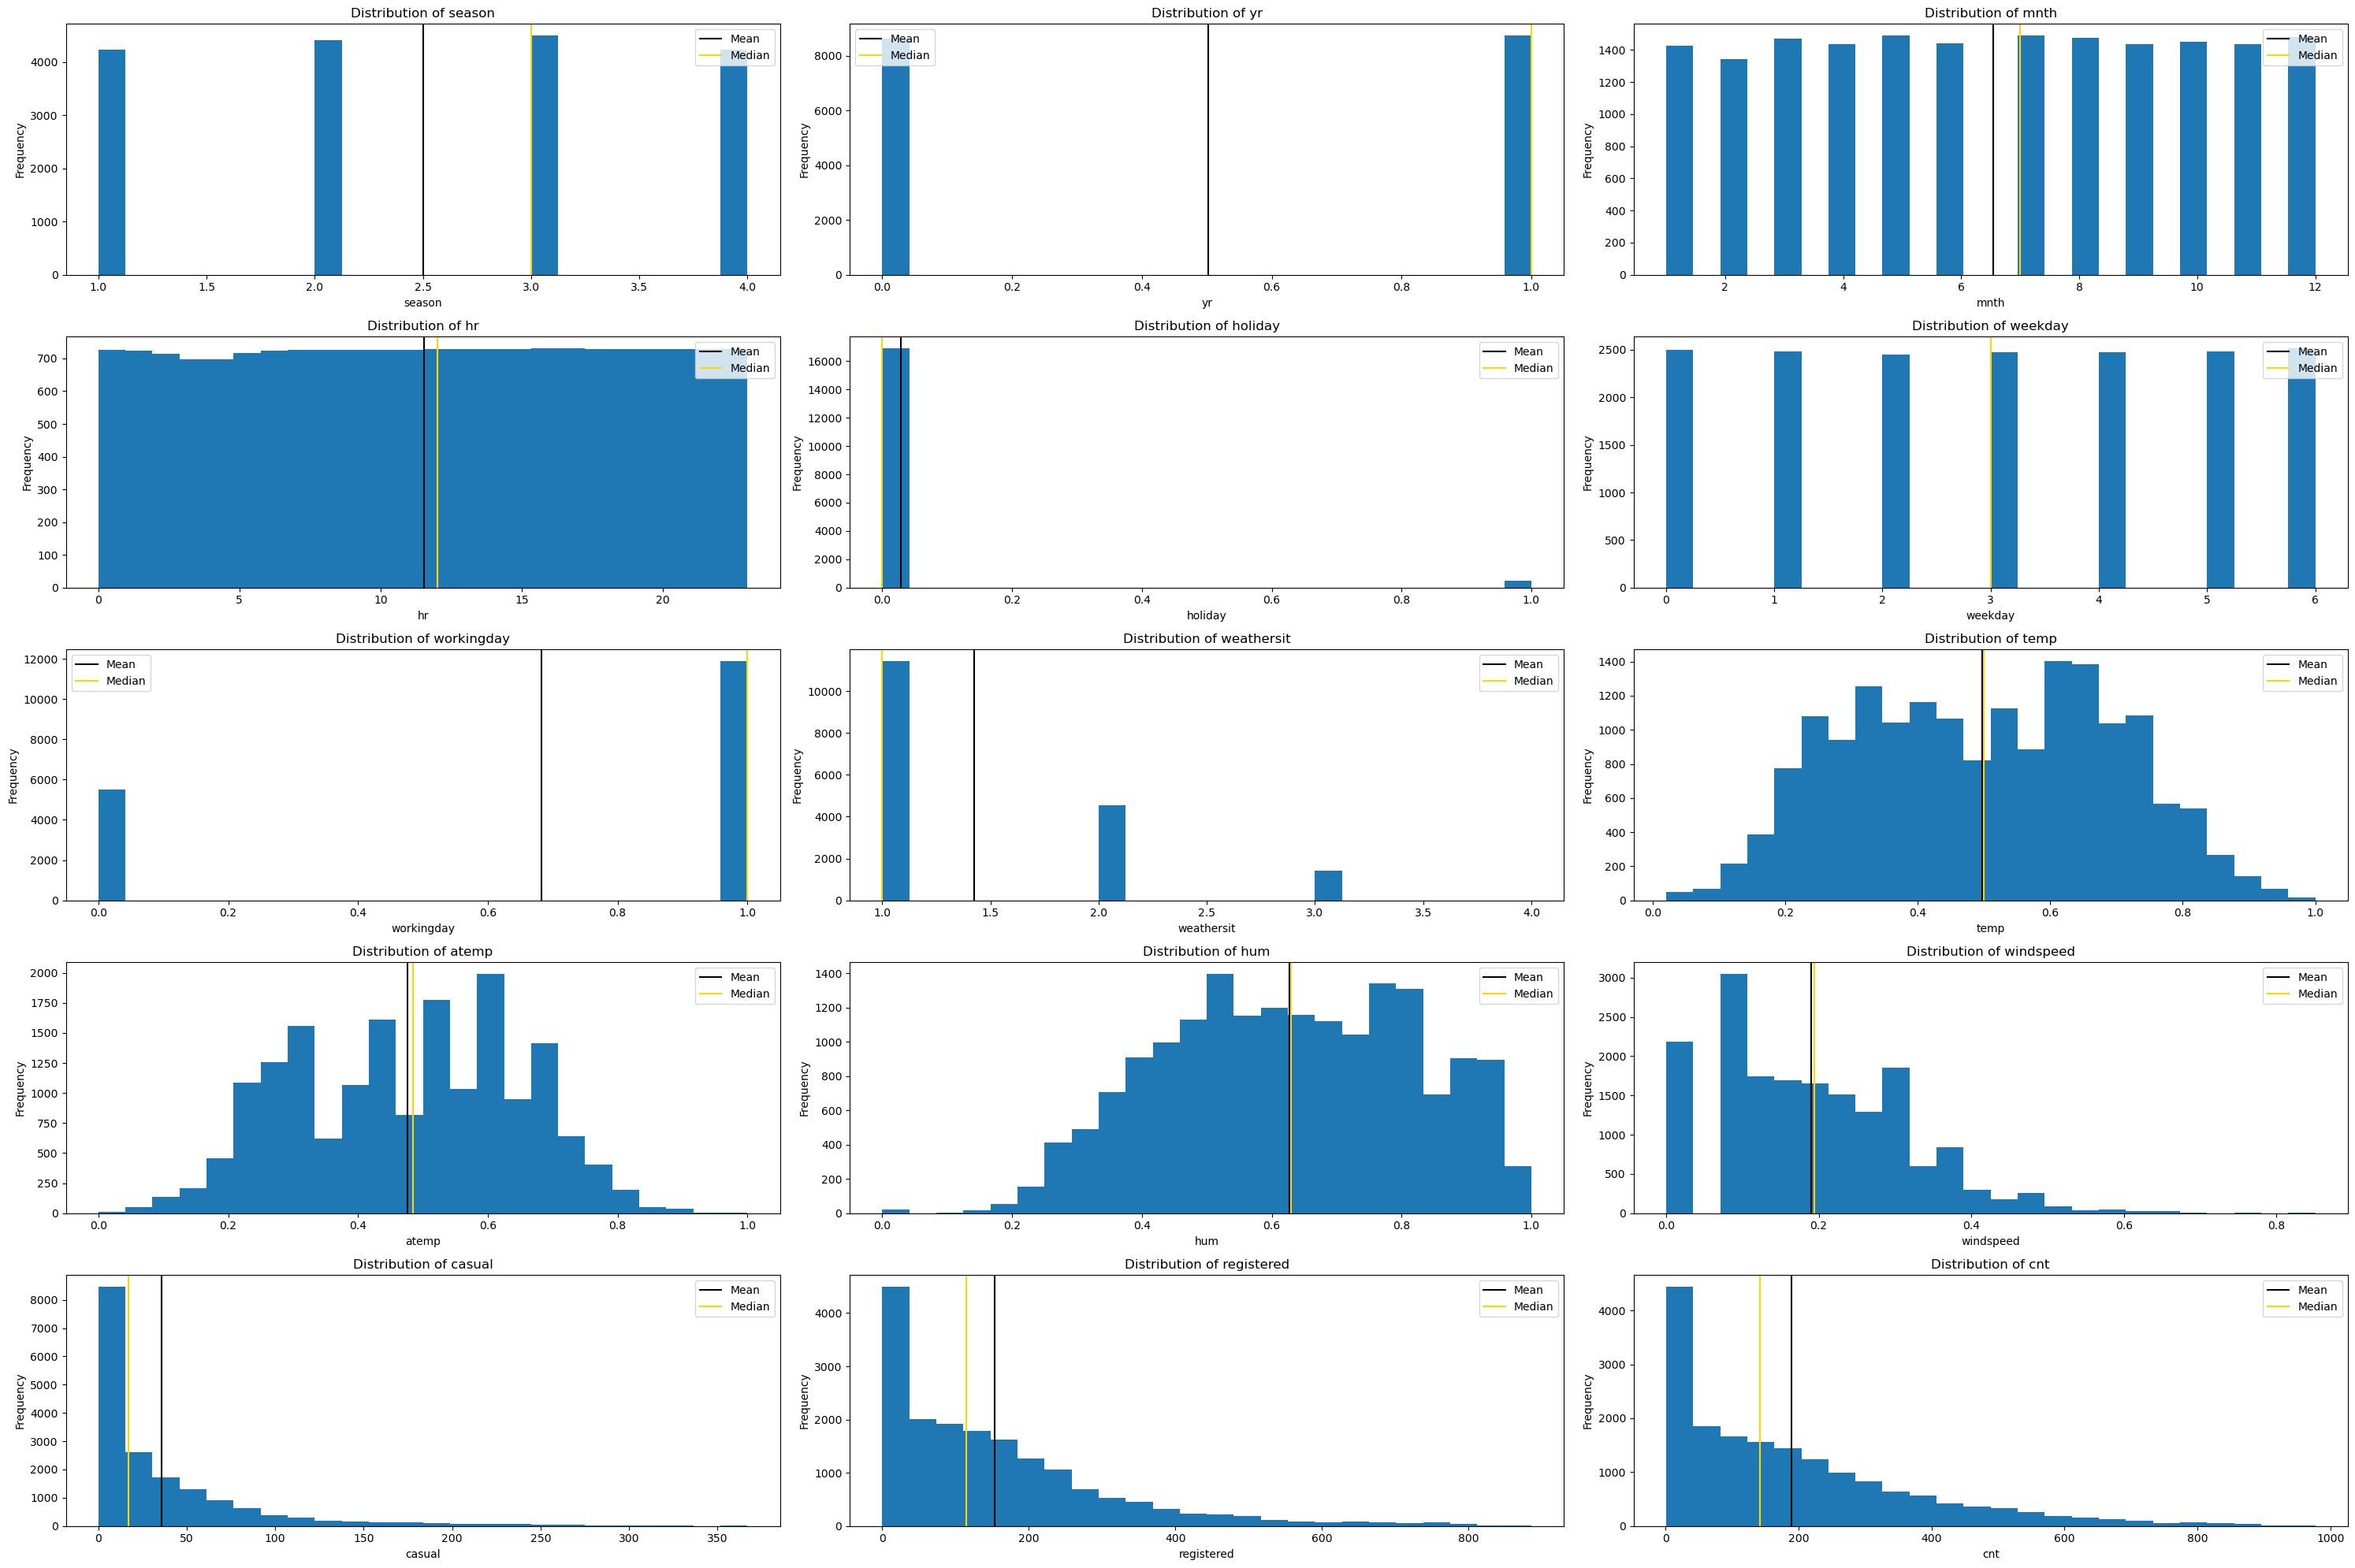

In [17]:
# We will be making 2 rows x 4 columns of subplots
plt.subplots(5,3, figsize=(30,20))

# Creating the for loop
for slot_num, column in enumerate(df_num.columns, start=1):
    
    # Creating a hist for every iteration
    plt.subplot(5,3,slot_num)
    plt.hist(df[column], bins=24)
    
    # Set the titles and labels
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Adding median and mean lines
    plt.axvline(df[column].mean(), c='black', label='Mean')
    plt.axvline(df[column].median(), c='gold', label='Median')
    plt.legend()
    
plt.tight_layout()

plt.show()    

Finding:
- The distribution of the 'season' variable indicates that each of the four seasons has more than 4000 records.
- The data covers a span of two years with more thn 8000 records for each year.
- The distribution of the 'month' variable shows the number of records for each month. The majority of months have more than 1400 cases, except for month 2, which has a value lower than this threshold.
- The 'hr' variable's distribution shows that there are approximately 700 records for most hours.
- The holiday distribution plot indicates that the number of records corresponding to holidays is significantly lower than the number of records for non-holiday days.
- The distribution of the 'weekday' variable suggests that each of the seven weekdays has a relatively similar number of records, with approximately less than 2500 observations each. 
- From the distribution of the 'workingday' column, it is evident that the number of records for working days is significantly higher compared to the number of records for non-working days.
- Weather situation 1 has the highest number of records, followed by weather situation 2, and then weather situation 3.
- The variables 'temp' and 'atemp' exhibit approximately normal distributions.
- The variable 'hum' is slightly left-skewed.
- The variable 'windspeed' displays a right-skewed distribution.
- The Target variables 'casual', 'registered', and 'cnt' demonstrate a notably strong right-skewed distribution. This columns may have zero values. To address this skewness, there are a number of ways such as adding value 1 to variables and then log transformation, root square, cube root square,... . we apply a log transformation to target variables as they lead to better result, in this project.

In [13]:
# Dealing with skewness by log transformation for the three target variables 'casual', 'registered', and 'cnt':
df['t_casual'] =  np.log(df['casual']+1)  # constant one is added to variables to be greater than zero.
df['t_registered'] =  np.log(df['registered']+1)
df['t_cnt'] =  np.log(df['cnt']+1)

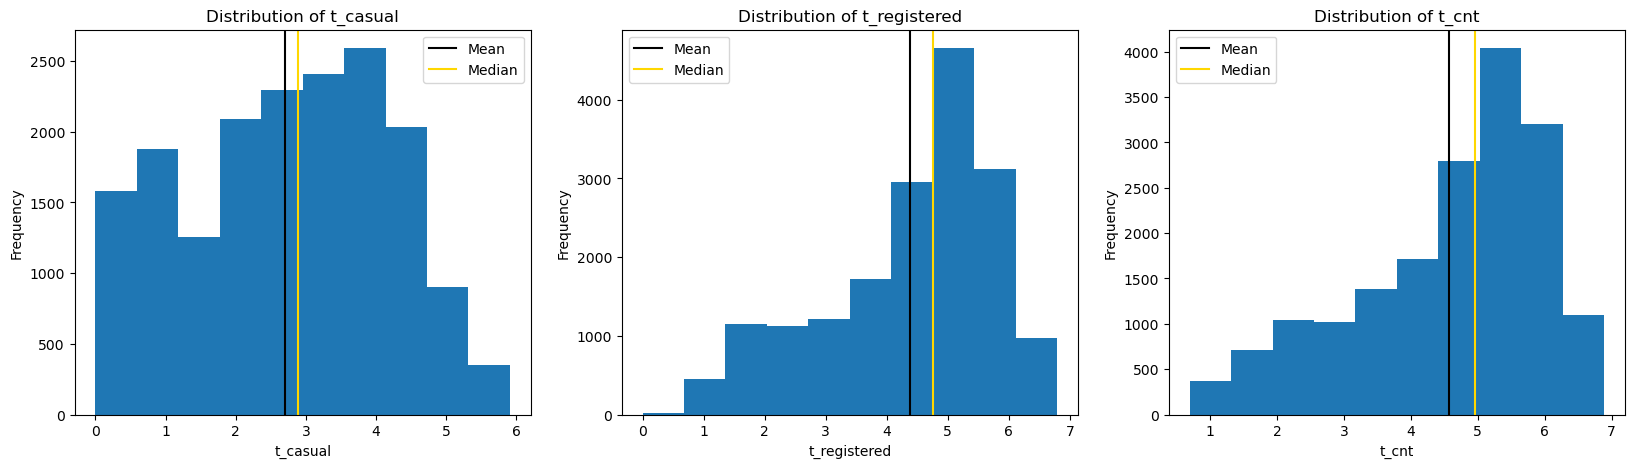

In [14]:
# We will be making 1 rows x 3 columns of subplots for the three transformed target variables
t_uers=['t_casual','t_registered','t_cnt']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    plt.hist(df[column])
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.axvline(df[column].mean(), c='black', label='Mean')
    plt.axvline(df[column].median(), c='gold', label='Median')
    plt.legend()
    
    i += 1
plt.show()   

Finding:
- The transformed target variables 't_casual', 't_registered', and 't_cnt' demonstrate reduced skewness compared to their original distributions.

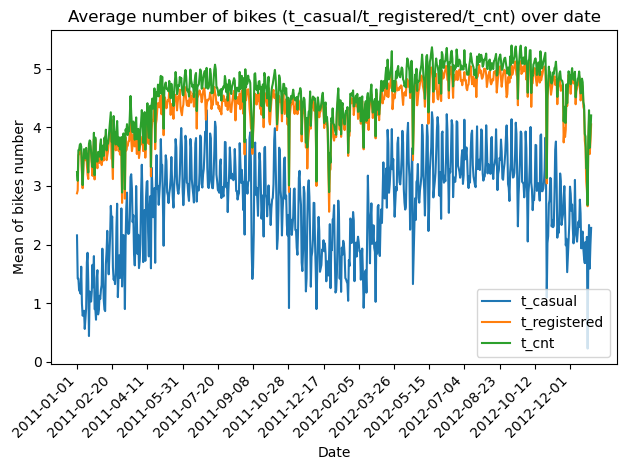

In [20]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over date:
dteday_casual = df.groupby('dteday')['t_casual'].mean()  # average of t_casual over date
dteday_registered = df.groupby('dteday')['t_registered'].mean()  # average of t_registered over date
dteday_cnt = df.groupby('dteday')['t_cnt'].mean()  # average of t_cnt over date

# Create a list of dates for the x-axis ticks
dates = df['dteday'].unique()

plt.figure()
plt.plot(dates, dteday_casual, label='t_casual')
plt.plot(dates, dteday_registered, label='t_registered')
plt.plot(dates, dteday_cnt, label='t_cnt')

plt.xlabel("Date")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bikes (t_casual/t_registered/t_cnt) over date")

# Set x-axis ticks at every 50th data point
plt.xticks(dates[::50], rotation=45, ha='right') 

plt.legend()
plt.tight_layout()
plt.show()

Finding:
- Over the two years (2011-2012), it is evident that the average number of bikes rented by casual users is lower than that of registered users. As expected, the average value for 'cnt' (total count) is higher than both 'casual' and 'registered', given that 'cnt' represents the sum of 'casual' and 'registered' bike rentals.
- The analysis indicates a noticeable increase in the number of registered bike rentals from the year 2011 to 2012. However, the increase in casual rentals over the same period is relatively small.

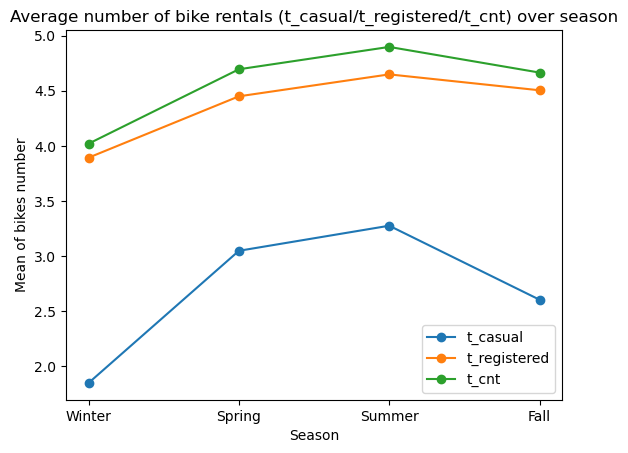

In [21]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over season:
season_casual = df.groupby('season')['t_casual'].mean()  # average of t_casual over season
season_registered = df.groupby('season')['t_registered'].mean()  # average of t_registered over season
season_cnt = df.groupby('season')['t_cnt'].mean()  # average of t_cnt over season

# Set the x-axis ticks and labels
seasons = ['Winter','Spring', 'Summer', 'Fall'] 
season_labels = [1, 2, 3, 4]

plt.figure()
plt.plot(season_labels, season_casual, label='t_casual',marker='o')
plt.plot(season_labels, season_registered, label='t_registered',marker='o')
plt.plot(season_labels, season_cnt, label='t_cnt',marker='o')

plt.xticks(season_labels, seasons)  # Set the x-axis ticks to the season numbers
plt.xlabel("Season")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over season")
plt.legend()
plt.show()

Finding:
- For both casual and registered users, the average number of bike rentals is higher during the spring and summer seasons compared to the winter and fall seasons.
- On average, the 'cnt' variable exhibits the highest average number of rental bikes, followed by registered users and then casual users.

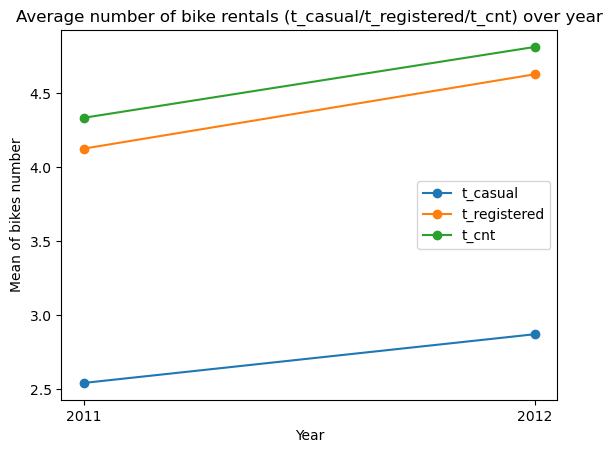

In [22]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over year:
yr_casual = df.groupby('yr')['t_casual'].mean()  # average of t_casual over year
yr_registered = df.groupby('yr')['t_registered'].mean()  # average of t_registered over year
yr_cnt = df.groupby('yr')['t_cnt'].mean()  # average of t_cnt over year

# Set the x-axis ticks and labels
year = ['2011', '2012']

plt.figure()
plt.plot(year, yr_casual, label='t_casual',marker='o')
plt.plot(year, yr_registered, label='t_registered',marker='o')
plt.plot(year, yr_cnt, label='t_cnt',marker='o')

plt.xlabel("Year")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over year")
plt.legend()
plt.show()

Finding:
- For both casual and registered users, the average number of bike rentals increased in the year 2012 compared to the year 2011. - The slope of this increasing trend is larger for registered users than for casual users, indicating a more substantial increase in bike rentals for registered users over the two years.

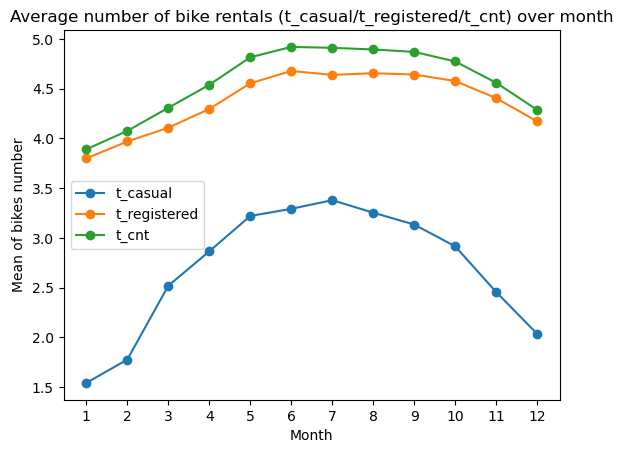

In [23]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over month:
mnth_casual = df.groupby('mnth')['t_casual'].mean()  # average of t_casual over month
mnth_registered = df.groupby('mnth')['t_registered'].mean()  # average of t_registered over month
mnth_cnt = df.groupby('mnth')['t_cnt'].mean()  # average of t_cnt over month

plt.figure()
plt.plot(mnth_casual, label='t_casual',marker='o')
plt.plot(mnth_registered, label='t_registered',marker='o')
plt.plot(mnth_cnt, label='t_cnt',marker='o')
plt.xlabel("Month")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over month")
plt.xticks(range(1, 13), range(1, 13))  # Set the x-axis ticks and labels to show months from 1 to 12
plt.legend()
plt.show()

Finding:
- The analysis indicates that, on average, the number of rental bikes during the first and last months of the year is lower compared to the other months for both casual and registered users.
- Overall, the average number of rental bikes for registered users is higher than the value for casual users.

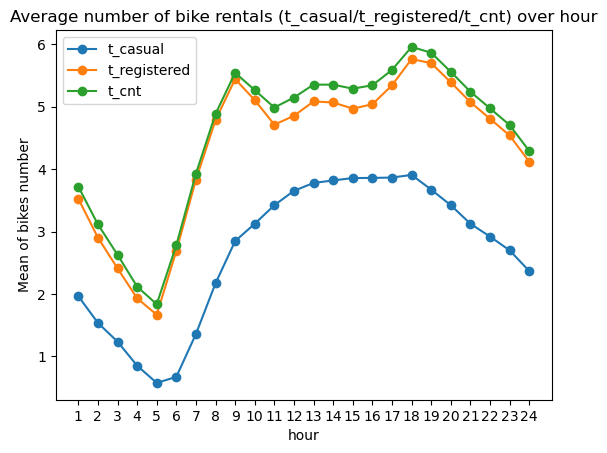

In [24]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over hour:
hr_casual=df.groupby('hr')['t_casual'].mean() # average of t_casual over hour
hr_registered=df.groupby('hr')['t_registered'].mean() # average of t_registered over hour
hr_cnt=df.groupby('hr')['t_cnt'].mean() # average of t_cnt over hour

plt.figure()
plt.plot(hr_casual,label='t_casual',marker='o')
plt.plot(hr_registered,label='t_registered',marker='o')
plt.plot(hr_cnt, label='t_cnt',marker='o')
plt.xlabel("hour")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over hour")
plt.xticks(range(0, 24), range(1, 25))  # Set the x-axis ticks and labels to show hours from 1 to 24
plt.legend()
plt.show()

Finding: 
- The distribution of rental bike numbers varies, on average, throughout the hours of a day for both casual and registered users.
- For casual users, the average rental bike numbers increase during the hours between 5 and 18.
- For registered users, the average rental bike numbers exhibit two distinct peaks at hours 9 and 18.
- In general, the average number of rental bikes for registered users surpasses that of casual users.

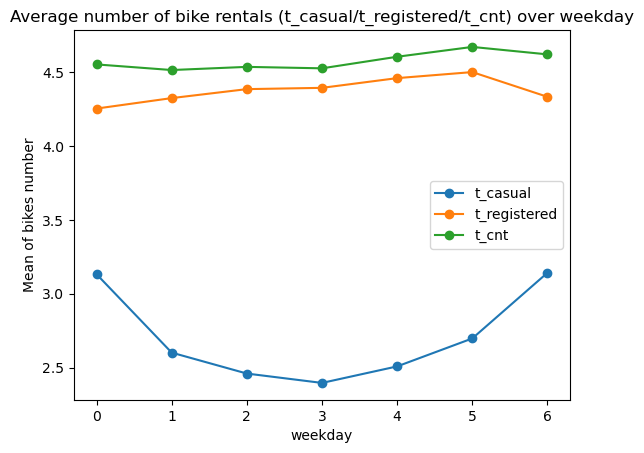

In [25]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over weekday:
weekday_casual=df.groupby('weekday')['t_casual'].mean() # average of t_casual over weekday
weekday_registered=df.groupby('weekday')['t_registered'].mean() # average of t_registered over weekday
weekday_cnt=df.groupby('weekday')['t_cnt'].mean() # average of t_cnt over weekday

plt.figure()
plt.plot(weekday_casual,label='t_casual',marker='o')
plt.plot(weekday_registered,label='t_registered',marker='o')
plt.plot(weekday_cnt, label='t_cnt',marker='o')
plt.xlabel("weekday")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over weekday")
plt.legend()
plt.show()

Finding:
- It is evident that at the beginning and end of the week, the average number of casual rentals is higher compared to the middle of the week.
- However, the opposite behavior is observed for registered users. The average number of rentals is higher in the middle of the week compared to the beginning and end of the week.
- In general, the average number of rental bikes for the 'cnt' variable surpasses that of registered users and is followed by that of casual users.

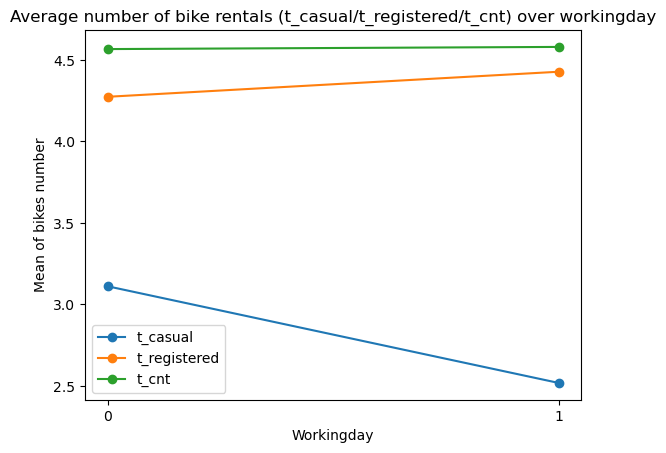

In [26]:
# Average number of transformed rentals (t_casual/t_registered/t_cnt) over workingday:
workingday_casual = df.groupby('workingday')['t_casual'].mean()  # average of t_casual over workingday
workingday_registered = df.groupby('workingday')['t_registered'].mean()  # average of t_registered over workingday
workingday_cnt = df.groupby('workingday')['t_cnt'].mean()  # average of t_cnt over workingday

plt.figure()
plt.plot([0, 1], workingday_casual, label='t_casual',marker='o')
plt.plot([0, 1], workingday_registered, label='t_registered',marker='o')
plt.plot([0, 1], workingday_cnt, label='t_cnt',marker='o')
plt.xlabel("Workingday")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over workingday")
plt.xticks([0, 1], ['0', '1'])  # Set the x-axis ticks and labels
plt.legend()
plt.show()

Finding:
- For casual users, the average number of rentals is lower on working days than on non-working days.
- However, the opposite behavior is observed for registered users. The average number of rentals is higher on working days compared to non-working days.
- A similar trend as registered users is seen for the t_cnt variable, but with a smaller slope of increase on working days.

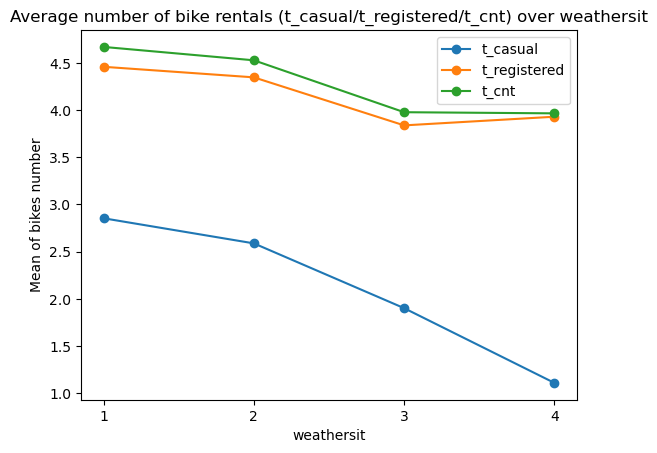

In [27]:
# Average number of transformed rentals (casual/registered/cnt) over weather situation:
weathersit_casual=df.groupby('weathersit')['t_casual'].mean() # average of t_casual over weathersit
weathersit_registered=df.groupby('weathersit')['t_registered'].mean() # average of t_registered over weathersit
weathersit_cnt=df.groupby('weathersit')['t_cnt'].mean() # average of t_cnt over weathersit

plt.figure()
plt.plot(weathersit_casual,label='t_casual',marker='o')
plt.plot(weathersit_registered,label='t_registered',marker='o')
plt.plot(weathersit_cnt, label='t_cnt',marker='o')
plt.xlabel("weathersit")
plt.ylabel("Mean of bikes number")
plt.title("Average number of bike rentals (t_casual/t_registered/t_cnt) over weathersit")
plt.xticks(range(1, 5), range(1, 5))  # Set the x-axis ticks and labels to show weather situation from 1 to 4
plt.legend()
plt.show()

Finding:
- The mean number of rentals for t_casual and t_registered users, as well as the t_cnt variable, shows a decreasing trend as the values of weather situations increase.

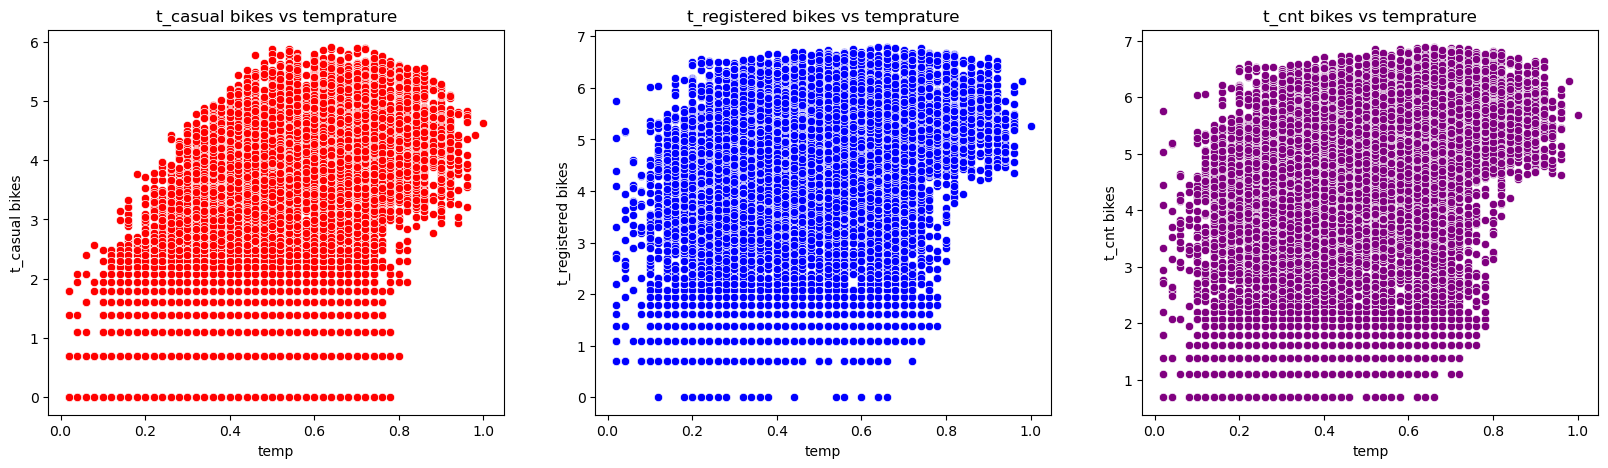

In [28]:
# relationship between transformed rental bikes users and temp
t_uers=['t_casual','t_registered','t_cnt']
colors=['red','blue','purple']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    sns.scatterplot(x='temp', y=column, data=df, color=colors[i-1])
    plt.xlabel('temp')
    plt.ylabel(f'{column} bikes')
    plt.title(f'{column} bikes vs temprature')
    i += 1
plt.show()  

Finding:
- The average number of bikes for t_casual and t_registered users, as well as the t_cnt field, does not exhibit notable linear correlation with temperature.

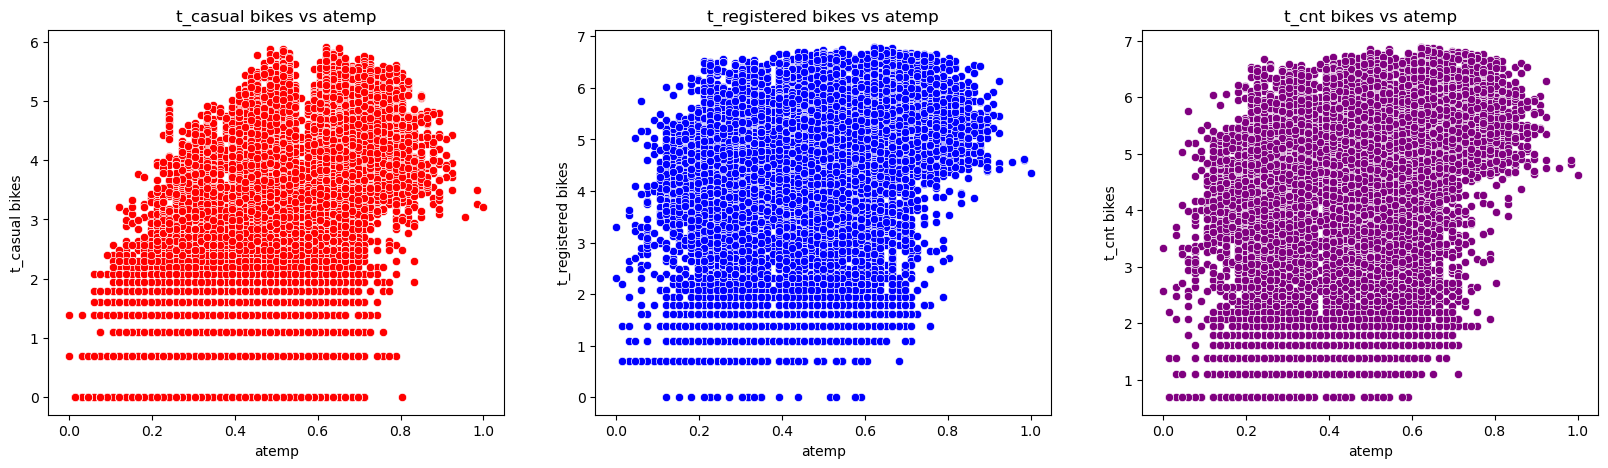

In [29]:
# relationship between transformed rental bikes users and atemp
t_uers=['t_casual','t_registered','t_cnt']
colors=['red','blue','purple']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    sns.scatterplot(x='atemp', y=column, data=df, color=colors[i-1])
    plt.xlabel('atemp')
    plt.ylabel(f'{column} bikes')
    plt.title(f'{column} bikes vs atemp')
    i += 1
plt.show()  

Finding:
- There is no strong linear correlation between feeling temperature and the average number of bikes for t_casual and t_registered users as well as t_cnt filed.

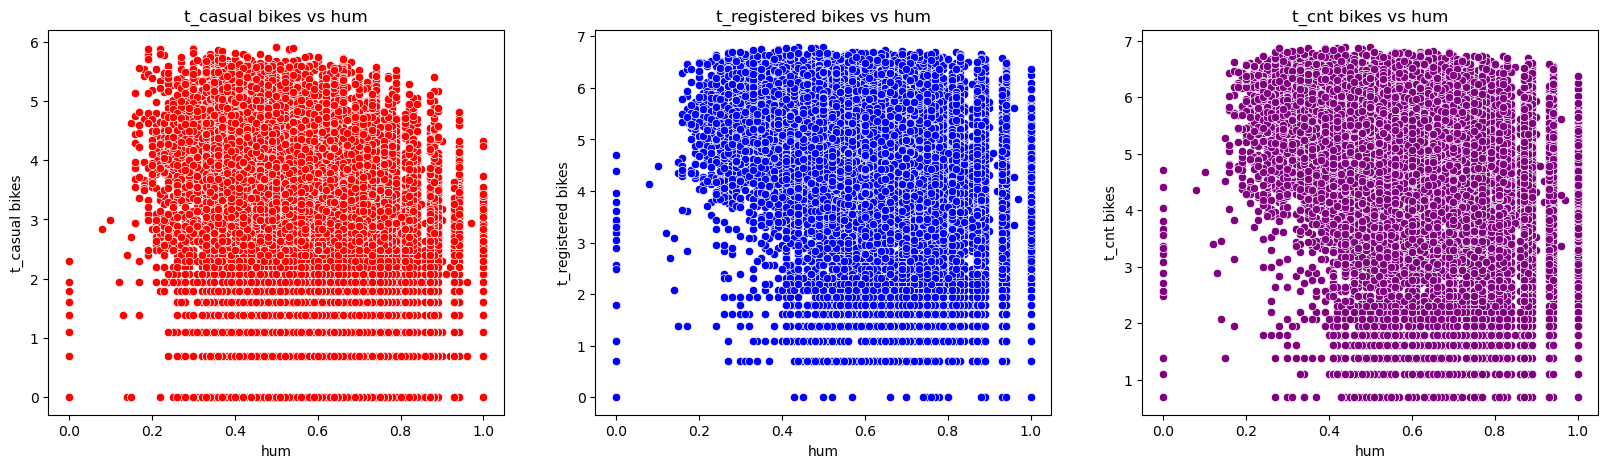

In [30]:
# relationship between transformed rental bikes users and hum
t_uers=['t_casual','t_registered','t_cnt']
colors=['red','blue','purple']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    sns.scatterplot(x='hum', y=column, data=df, color=colors[i-1])
    plt.xlabel('hum')
    plt.ylabel(f'{column} bikes')
    plt.title(f'{column} bikes vs hum')
    i += 1
plt.show()  

Finding:
- The visulas does not show a notable linear correlation between humidity and the average number of Bikes for t_casual and t_registered users as well as t_cnt filed.

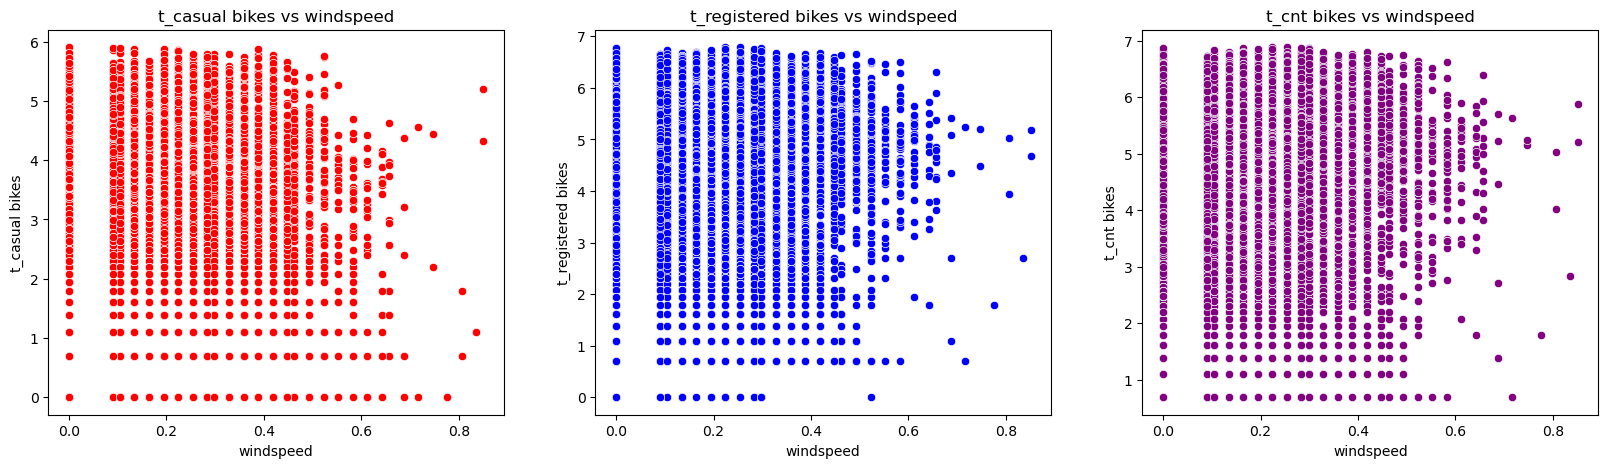

In [31]:
# relationship between transformed rental bikes users and windspeed
t_uers=['t_casual','t_registered','t_cnt']
colors=['red','blue','purple']
plt.subplots(1, 3, figsize=(20, 5))
i=1
for column in t_uers:
    plt.subplot(1, 3, i)
    sns.scatterplot(x='windspeed', y=column, data=df, color=colors[i-1])
    plt.xlabel('windspeed')
    plt.ylabel(f'{column} bikes')
    plt.title(f'{column} bikes vs windspeed')
    i += 1
plt.show()

Finding:
- The scatter plot does not display a linear correlation between windspeed and the average number of bikes for t_casual and t_registered users as well as t_cnt filed.

### Part 3: Statistical Analysis

In [32]:
# Here, we determine Which columns are positively or negatively correlated with the number of rental bikes 
# and see if they are statistically significant:
t_uers=['t_casual','t_registered','t_cnt']
for i in t_uers:
    print(f'\n correlation between number of {i} rentals and \n')
    for column in df_num.columns:
        if column in ['casual','registered','cnt']:
            continue
        else:
            t_statistic,p = stats.pearsonr(df[column],df[i])
            print(f"\t {column}: T_statistic={t_statistic:4.3f}, p_value={p:4.3f}")


 correlation between number of t_casual rentals and 

	 season: T_statistic=0.186, p_value=0.000
	 yr: T_statistic=0.111, p_value=0.000
	 mnth: T_statistic=0.121, p_value=0.000
	 hr: T_statistic=0.483, p_value=0.000
	 holiday: T_statistic=0.017, p_value=0.022
	 weekday: T_statistic=0.013, p_value=0.085
	 workingday: T_statistic=-0.185, p_value=0.000
	 weathersit: T_statistic=-0.171, p_value=0.000
	 temp: T_statistic=0.558, p_value=0.000
	 atemp: T_statistic=0.556, p_value=0.000
	 hum: T_statistic=-0.375, p_value=0.000
	 windspeed: T_statistic=0.103, p_value=0.000

 correlation between number of t_registered rentals and 

	 season: T_statistic=0.161, p_value=0.000
	 yr: T_statistic=0.180, p_value=0.000
	 mnth: T_statistic=0.112, p_value=0.000
	 hr: T_statistic=0.566, p_value=0.000
	 holiday: T_statistic=-0.037, p_value=0.000
	 weekday: T_statistic=0.034, p_value=0.000
	 workingday: T_statistic=0.051, p_value=0.000
	 weathersit: T_statistic=-0.108, p_value=0.000
	 temp: T_statistic=0.34

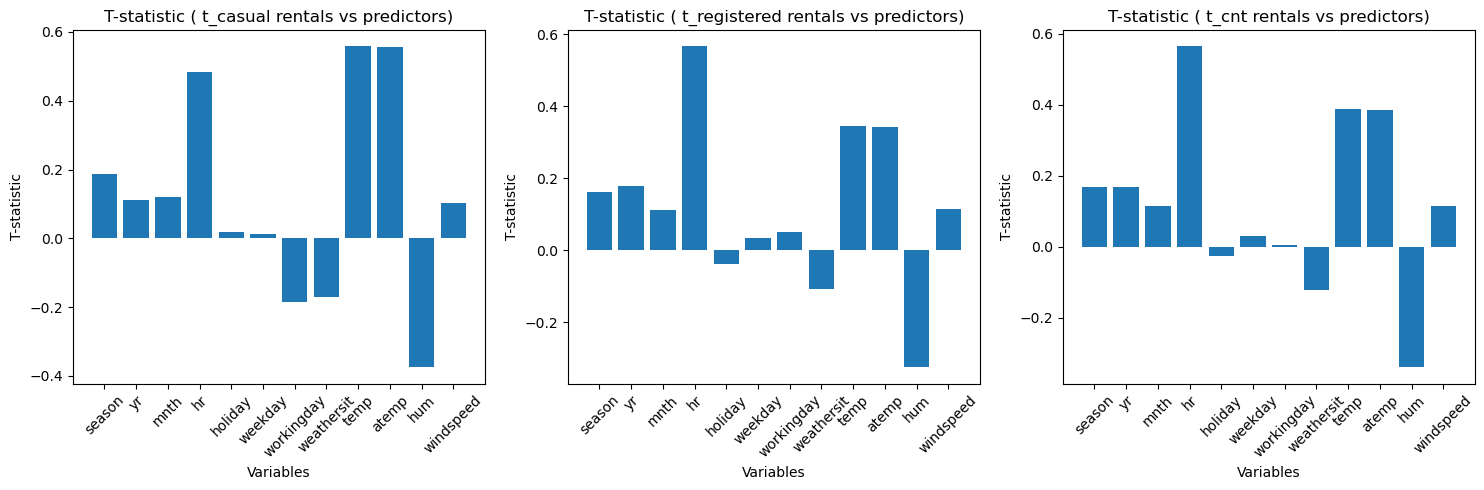

In [33]:
t_users = ['t_casual', 't_registered', 't_cnt']

# Create a dictionary to store the T-statistic values
t_statistics = {}

# Calculate T-statistic for each variable
for i in t_users:
    t_statistics[i] = {}
    for column in df_num.columns:
        if column in ['casual', 'registered', 'cnt']:
            continue
        else:
            t_statistic, p = stats.pearsonr(df[column], df[i])
            t_statistics[i][column] = t_statistic

# Create a subplot with three bar plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Plotting bar plots for each target variable
for idx, i in enumerate(t_users):
    axs[idx].bar(t_statistics[i].keys(), t_statistics[i].values())
    axs[idx].set_xlabel('Variables')
    axs[idx].set_ylabel('T-statistic')
    axs[idx].set_title(f'T-statistic ( {i} rentals vs predictors)')
    axs[idx].tick_params(axis='x', rotation=45) 
# Adjust layout and spacing
plt.tight_layout()

# Show the plot
plt.show()

Finding:
- For casual users:
   - season, yr, mnth, hr, holiday, weekday, temp, atemp, and windspeed are positively correlated with number of t_casual rentals.
   - workingday,  weathersit, and hum are negatively correlated with number of t_casual rentals.

- For registered users:
   - season, yr, mnth, hr, ,weekday, workingday, temp, atemp, and windspeed are positively correlated with number of t_registered rentals.
   - holiday, weathersit, and hum are negatively correlated with number of t_registered rentals.
   
   
- For 'cnt' column:
   - season, yr, mnth, hr, ,weekday, workingday, temp, atemp, and windspeed are positively correlated with number of t_cnt rentals.
   - holiday, weathersit, and hum are negatively correlated with number of t_cnt rentals.

- Since all the p-values are less that 0.05, we conclude that all these relations are statistically significant.
- temp, atemp, hr, and hum are the predictors with higher correlation with the three target variables.

### Part 4: preprocessing Data for Modeling

In [15]:
# looking at our dataframe
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,t_casual,t_registered,t_cnt
0,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1.386294,2.639057,2.833213
1,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,2.197225,3.496508,3.713572
2,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1.791759,3.332205,3.496508
3,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1.386294,2.397895,2.639057
4,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,0.000000,0.693147,0.693147


In following cell, we remove unnecessary columns 'casual','registered','cnt' as we are modeling their transformed versions of them. Also 'dteday' will be redundant as we have columns for its components as years, month, day,  ....

In [16]:
# removing dteday column and the non-transformed target variables and store remaining variables in data
data=df.drop(['dteday','casual','registered','cnt'],axis=1)
data.head()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,t_casual,t_registered,t_cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1.386294,2.639057,2.833213
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,2.197225,3.496508,3.713572
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,1.791759,3.332205,3.496508
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,1.386294,2.397895,2.639057
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.000000,0.693147,0.693147


In following cells, dummy variables are created for some of the columns like `season`, `mnth`, `weekday`, `weathersit`, and `hr`. Although these columns have already been transformed into numerical representations, it's important to recognize that they inherently represent categorical variables. By introducing dummy variables, we enable the model to appropriately treat them as categorical predictors. After careful analysis, it's worth highlighting that this preprocessing steps performed on the data have significantly contributed to the improved performance of our models.


In [17]:
#Create dummies for column 'season'
dummies = pd.get_dummies(data['season'])
dummies.columns=['season1','season2','season3','season4']
dummies.iloc[:,:3].head()
data_drop_season = data.drop(['season'], axis = 1)
data = pd.concat([data_drop_season, dummies.iloc[:,:3]], axis = 1)
data.head()

,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,t_casual,t_registered,t_cnt,season1,season2,season3
0,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,1.386294,2.639057,2.833213,1,0,0
1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,2.197225,3.496508,3.713572,1,0,0
2,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,1.791759,3.332205,3.496508,1,0,0
3,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,1.386294,2.397895,2.639057,1,0,0
4,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0.000000,0.693147,0.693147,1,0,0


In [18]:
#Create dummies for column 'mnth'
dummies = pd.get_dummies(data['mnth'])
dummies.columns=['mnth1','mnth2','mnth3','mnth4','mnth5','mnth6','mnth7','mnth8','mnth9','mnth10','mnth11','mnth12',]
dummies.iloc[:,:11].head()
data_drop_mnth = data.drop(['mnth'], axis = 1)
data = pd.concat([data_drop_mnth, dummies.iloc[:,:11]], axis = 1)
data.head()

,yr,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,mnth2,mnth3,mnth4,mnth5,mnth6,mnth7,mnth8,mnth9,mnth10,mnth11
0,0,0,0,6,0,1,0.24,0.2879,0.81,0.0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,6,0,1,0.22,0.2727,0.80,0.0,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,6,0,1,0.22,0.2727,0.80,0.0,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,6,0,1,0.24,0.2879,0.75,0.0,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0,6,0,1,0.24,0.2879,0.75,0.0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
#Create dummies for column 'weekday'
dummies = pd.get_dummies(data['weekday'])
dummies.columns=['weekday0','weekday1','weekday2','weekday3','weekday4','weekday5','weekday6']
dummies.iloc[:,:6].head()
data_drop_weekday = data.drop(['weekday'], axis = 1)
data = pd.concat([data_drop_weekday, dummies.iloc[:,:6]], axis = 1)
data.head()

,yr,hr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,t_casual,...,mnth8,mnth9,mnth10,mnth11,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5
0,0,0,0,0,1,0.24,0.2879,0.81,0.0,1.386294,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0.22,0.2727,0.80,0.0,2.197225,...,0,0,0,0,0,0,0,0,0,0
2,0,2,0,0,1,0.22,0.2727,0.80,0.0,1.791759,...,0,0,0,0,0,0,0,0,0,0
3,0,3,0,0,1,0.24,0.2879,0.75,0.0,1.386294,...,0,0,0,0,0,0,0,0,0,0
4,0,4,0,0,1,0.24,0.2879,0.75,0.0,0.000000,...,0,0,0,0,0,0,0,0,0,0


In [20]:
#Create dummies for column 'weathersit'
dummies = pd.get_dummies(data['weathersit'])
dummies.columns=['weathersit1','weathersit2','weathersit3','weathersit4']
dummies.iloc[:,:3].head()
data_drop_weathersit = data.drop(['weathersit'], axis = 1)
data = pd.concat([data_drop_weathersit, dummies.iloc[:,:3]], axis = 1)
data.head()

,yr,hr,holiday,workingday,temp,atemp,hum,windspeed,t_casual,t_registered,...,mnth11,weekday0,weekday1,weekday2,weekday3,weekday4,weekday5,weathersit1,weathersit2,weathersit3
0,0,0,0,0,0.24,0.2879,0.81,0.0,1.386294,2.639057,...,0,0,0,0,0,0,0,1,0,0
1,0,1,0,0,0.22,0.2727,0.80,0.0,2.197225,3.496508,...,0,0,0,0,0,0,0,1,0,0
2,0,2,0,0,0.22,0.2727,0.80,0.0,1.791759,3.332205,...,0,0,0,0,0,0,0,1,0,0
3,0,3,0,0,0.24,0.2879,0.75,0.0,1.386294,2.397895,...,0,0,0,0,0,0,0,1,0,0
4,0,4,0,0,0.24,0.2879,0.75,0.0,0.000000,0.693147,...,0,0,0,0,0,0,0,1,0,0


In [21]:
#Create dummies for column 'hr' 
dummies = pd.get_dummies(data['hr'])
dummies.columns=['hr0','hr1','hr2','hr3','hr4','hr5','hr6','hr7','hr8','hr9','hr10','hr11','hr12',
                'hr13','hr14','hr15','hr16','hr17','hr18','hr19','hr20','hr21','hr22','hr23']
dummies.iloc[:,:23].head()
data_drop_hr = data.drop(['hr'], axis = 1)
data = pd.concat([data_drop_hr, dummies.iloc[:,:23]], axis = 1)
data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,t_casual,t_registered,t_cnt,...,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21,hr22
0,0,0,0,0.24,0.2879,0.81,0.0,1.386294,2.639057,2.833213,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,2.197225,3.496508,3.713572,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,1.791759,3.332205,3.496508,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,1.386294,2.397895,2.639057,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,0.000000,0.693147,0.693147,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# define feature matrix X and target variables y_t, y_c, and y_r corresponding to total count, casual users and registered users rentals
X=data.drop(['t_casual','t_registered','t_cnt'], axis = 1)        # all the features in `data` dataframe
y_t=data['t_cnt']       # for total count
y_c=data['t_casual']    # for casual users
y_r=data['t_registered']  # for registered users


In [27]:
# sanity check
X.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,season1,season2,season3,...,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21,hr22
0,0,0,0,0.24,0.2879,0.81,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0.22,0.2727,0.80,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0.22,0.2727,0.80,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0.24,0.2879,0.75,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0.24,0.2879,0.75,0.0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
# adding a constant column to X
X_withconstant = sm.add_constant(X)

In [29]:
# Keep 80% in the training set and put 20% in the test set
X_train, X_test, y_t_train, y_t_test,y_c_train, y_c_test ,y_r_train, y_r_test= train_test_split(X_withconstant, y_t,y_c,y_r, test_size=0.2, random_state=123)

It's important to note that in our train-test split function, we ensure that all three target variables are split in the same manner. As a result, they share exactly the same indices, making them directly comparable to each other.

In [30]:
# sanity check
print(y_c_test.head())
print(y_t_test.head())
print(y_r_test.head())

5792     4.997212
7823     4.736198
15426    2.197225
15028    4.276666
12290    3.526361
Name: t_casual, dtype: float64
5792     5.690359
7823     5.749393
15426    4.442651
15028    5.624018
12290    5.998937
Name: t_cnt, dtype: float64
5792     5.003946
7823     5.303305
15426    4.343805
15028    5.327876
12290    5.913503
Name: t_registered, dtype: float64


In [31]:
# sanity check
X_train.head()

,const,yr,holiday,workingday,temp,atemp,hum,windspeed,season1,season2,...,hr13,hr14,hr15,hr16,hr17,hr18,hr19,hr20,hr21,hr22
2837,1.0,0,0,1,0.54,0.5152,0.83,0.2836,0,1,...,0,0,0,0,0,0,0,0,0,0
15553,1.0,1,0,1,0.56,0.5303,0.73,0.2985,0,0,...,0,0,0,0,0,0,0,0,0,0
1931,1.0,0,0,0,0.18,0.1818,0.55,0.1940,0,1,...,0,0,0,0,0,0,0,0,0,0
5233,1.0,0,0,1,0.74,0.6515,0.37,0.0896,0,0,...,0,0,0,0,0,0,0,0,0,0
11900,1.0,1,0,1,0.58,0.5455,0.88,0.1343,0,1,...,0,0,0,0,0,0,0,0,0,0


### Part 5: Modeling Total Count Target Variable

### 5-1: Linear Regression on y_t 
At this point, our data is well prepared for modeling. Lets begin with linear regression model on cnt target variable (y_t).

In [32]:
# fit Regression Model on and X_train and y_t_train  
lm_t = sm.OLS(y_t_train, X_train).fit()   #instantiation and fitting 
print(lm_t.summary())                     #summarization

                            OLS Regression Results                            
Dep. Variable:                  t_cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1268.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:14:55   Log-Likelihood:                -12439.
No. Observations:               13903   AIC:                         2.498e+04
Df Residuals:                   13850   BIC:                         2.538e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8295      0.348     11.017      

The values of R-squared and adjusted R-squared are both exactly 0.826. The equality of these two metrics suggests the absence of overfitting. However, several predictors exhibit p-values greater than 0.05, indicating their lack of statistical significance. Consequently, these predictors should be removed from the model.

In [33]:
# #Check Multicollinearity by computing VIF 
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]
print(vif)  #If VIF > 10 then multicollinearity is high

       Variable      VIF
0         const  4661.21
1            yr     1.02
2       holiday      inf
3    workingday      inf
4          temp    57.66
5         atemp    49.73
6           hum     1.94
7     windspeed     1.25
8       season1     7.40
9       season2    10.48
10      season3     8.63
11        mnth1     3.13
12        mnth2     2.97
13        mnth3     3.17
14        mnth4     5.24
15        mnth5     6.05
16        mnth6     5.82
17        mnth7     6.73
18        mnth8     6.42
19        mnth9     4.15
20       mnth10     2.40
21       mnth11     2.17
22     weekday0     1.73
23     weekday1      inf
24     weekday2      inf
25     weekday3      inf
26     weekday4      inf
27     weekday5      inf
28  weathersit1  1049.24
29  weathersit2   900.43
30  weathersit3   343.50
31          hr0     1.93
32          hr1     1.94
33          hr2     1.94
34          hr3     1.93
35          hr4     1.90
36          hr5     1.93
37          hr6     1.96
38          hr7     1.94


It seems there are strong multicollinearity for some features. 

In the subsequent steps, we modify the model by removing insignificant predictors and the ones causing multicollinearity.

In [34]:
# here, we remove the predictors with p_value > 0.05 and the ones wit VIF>10 to build the modified model
X_train_limited=X_train.drop(['weathersit2','mnth1','mnth7','mnth11','weekday4','temp'],axis=1)

lm2_t = sm.OLS(y_t_train, X_train_limited).fit()      #instantiation and fitting 
print(lm2_t.summary())                                #summarization

                            OLS Regression Results                            
Dep. Variable:                  t_cnt   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1403.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:15:04   Log-Likelihood:                -12444.
No. Observations:               13903   AIC:                         2.498e+04
Df Residuals:                   13855   BIC:                         2.535e+04
Df Model:                          47                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.8698      0.047     81.571      

Now, all the p-values are less than 0.05. The values of R-squared and adjusted R-squared are both exactly 0.826.

In [35]:
# computing VIF 
vif = pd.DataFrame()
vif["Variable"] = X_train_limited.columns
vif["VIF"] = [round(variance_inflation_factor(X_train_limited.values, i),2) for i in range(X_train_limited.shape[1])]
print(vif)

       Variable    VIF
0         const  88.90
1            yr   1.02
2       holiday   1.44
3    workingday   3.04
4         atemp   3.49
5           hum   1.92
6     windspeed   1.17
7       season1   2.98
8       season2   7.05
9       season3   4.05
10        mnth2   1.52
11        mnth3   1.68
12        mnth4   3.32
13        mnth5   3.57
14        mnth6   2.46
15        mnth8   1.66
16        mnth9   1.38
17       mnth10   1.50
18     weekday0   1.73
19     weekday1   1.80
20     weekday2   1.71
21     weekday3   1.72
22     weekday5   1.72
23  weathersit1   1.39
24  weathersit3   1.31
25          hr0   1.93
26          hr1   1.94
27          hr2   1.94
28          hr3   1.93
29          hr4   1.90
30          hr5   1.92
31          hr6   1.96
32          hr7   1.94
33          hr8   1.95
34          hr9   1.95
35         hr10   1.93
36         hr11   1.98
37         hr12   1.99
38         hr13   2.02
39         hr14   2.05
40         hr15   2.04
41         hr16   2.04
42         

There is No multicollinearirty.

In following cells, we check the assumptions of regression models including normality of residuals and homoscedasticity.

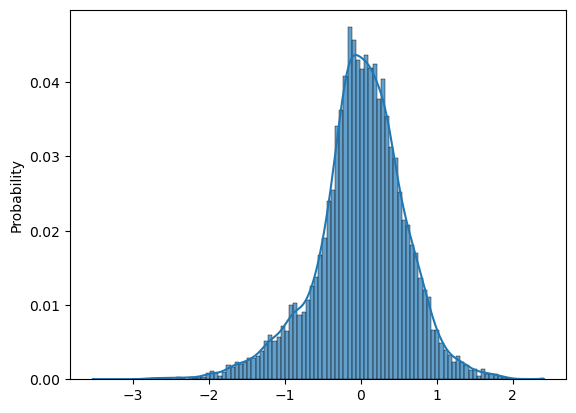

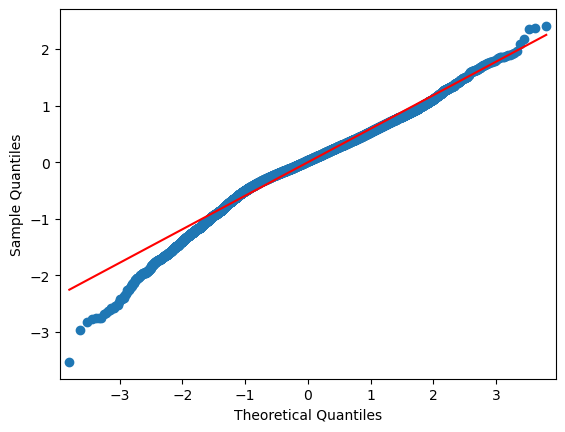

Shapiro-Wilk test on residuals: p-value = 0.000


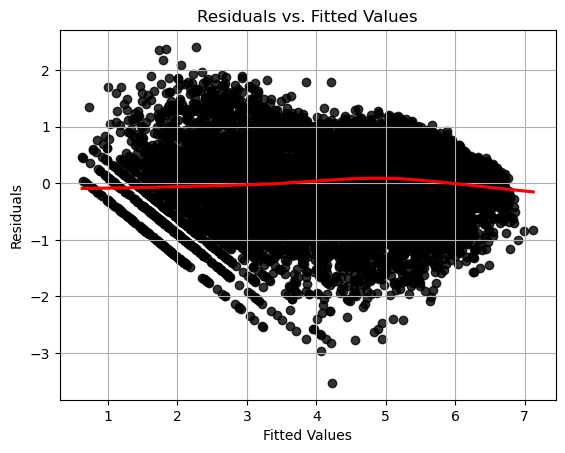

In [51]:
#Check Assumptions of Regression
################################
#Normality of residuals
########################
#Plot histogram of residuals
sns.histplot(lm2_t.resid, stat = 'probability', 
             kde = True, alpha = 0.7,)
########################
#QQ-plot
qqplot_lm = sm.qqplot(lm2_t.resid, line = 's')
plt.show()
########################
tstat, pval = stats.shapiro(lm2_t.resid)
print("Shapiro-Wilk test on residuals: p-value = {:4.3f}".format(pval))
########################
#Residuals vs. Fitted Values
sns.regplot(x = lm2_t.fittedvalues, y = lm2_t.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid()

- It seems regression assumptions ( normality of residuals and homoscedasticity) are not perfectly met which means t-test results are not completely reliable for predictors selection.
- The distribution of residuals appears to be nearly normal.
- The QQ-plot does not provide strong evidence for the normality of residuals.
- The p-value of the Shapiro-Wilk test is zero, indicating that the residuals do not follow a normal distribution.
- From the scatter plot of Residuals vs. Fitted Values, heteroscedasticity presents in the data.

In [36]:
# prediction on test data using modified Linear model for total count target variable (y_t)
X_test_limited=X_test.drop(['weathersit2','mnth1','mnth7','mnth11','weekday4','temp'],axis=1)

pred_test_lm2_t = lm2_t.predict(X_test_limited)
pred_train_lm2_t = lm2_t.predict(X_train_limited)

In [38]:
# compute different evaluation metrics
# for test:
abs_err_lm2_t = abs(y_t_test - pred_test_lm2_t) / y_t_test.mean()       # Percentage Absolute Error 
pmae_test_lm2_t = np.mean(abs_err_lm2_t)                               # Percentage Mean Absolute Error (PMAE)
prmse_test_lm2_t = np.sqrt(np.mean(abs_err_lm2_t**2))               # Percentage Root Mean Squared Error (PRMSE)

# for train:
abs_err_lm2_t = abs(y_t_train - pred_train_lm2_t)/ y_t_train.mean()        #Percentage Absolute Error 
pmae_train_lm2_t = np.mean(abs_err_lm2_t)                              # Percentage Mean Absolute Error (PMAE)
prmse_train_lm2_t = np.sqrt(np.mean(abs_err_lm2_t**2))              # Percentage Root Mean Squared Error (PRMSE)


In [39]:
# create a dataframe to compare different models
model_comp = pd.DataFrame({ 'Target variable' : 'total count',
                           'PMAE on train':    pmae_train_lm2_t,
                           'PMAE on test':    pmae_test_lm2_t,
                           'PRMSE on train' : prmse_train_lm2_t,
                           'PRMSE on test' : prmse_test_lm2_t,
                           'R-squared' : lm2_t.rsquared,
                           'Adjusted R-squared' : lm2_t.rsquared_adj,
                          }, index = ['Linear Regression'])
model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736


Finding:
- The PMAE and PRMSE values for train dataset are slightly higher than those for test dataset. 
- The R-squared and adj R-squared values are nearly identical.

### 5-2: Non Linear Regression on y_t 

Here, to enhance the model's performance, we introduce additional interaction and squared variables into our regression model.

In [40]:
# we are going to utilize the statistically significant predictors identified within the linear regression model.
X_train_modified=X_train_limited.copy()
X_test_modified=X_test_limited.copy()

In [41]:
# here, all the possible interaction and squared variables are added to the train and test data.
import itertools
# List of columns for interactions
columns = X_train_modified.columns

# Generate all possible pairs of interactions
interaction_pairs = list(itertools.combinations(columns, 2))

# Loop through interaction pairs and create new columns
for interaction in interaction_pairs:
    var1, var2 = interaction
    new_column_name = f'{var1}_{var2}_interaction'
    X_train_modified[new_column_name] = X_train_modified[var1] * X_train_modified[var2]
    X_test_modified[new_column_name] = X_test_modified[var1] * X_test_modified[var2]

In [42]:
X_train_modified.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season1,season2,season3,...,hr18_hr19_interaction,hr18_hr20_interaction,hr18_hr21_interaction,hr18_hr22_interaction,hr19_hr20_interaction,hr19_hr21_interaction,hr19_hr22_interaction,hr20_hr21_interaction,hr20_hr22_interaction,hr21_hr22_interaction
2837,1.0,0,0,1,0.5152,0.83,0.2836,0,1,0,...,0,0,0,0,0,0,0,0,0,0
15553,1.0,1,0,1,0.5303,0.73,0.2985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1931,1.0,0,0,0,0.1818,0.55,0.1940,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5233,1.0,0,0,1,0.6515,0.37,0.0896,0,0,1,...,0,0,0,0,0,0,0,0,0,0
11900,1.0,1,0,1,0.5455,0.88,0.1343,0,1,0,...,0,0,0,0,0,0,0,0,0,0


Utilizing a backward elimination process, we systematically remove predictors with insignificance (p-value > 0.05) 
from the models. In a loop defined for this purpose, the regression model is iteratively fitted to the training data
until all predictors with insignificance have been eliminated.

In [43]:
while True:

    # Fit the linear regression model
    lm3_t = sm.OLS(y_t_train, X_train_modified).fit()

    # Get the p-values for each feature
    p_values = lm3_t.pvalues

    # Find interactions with p-values greater than 0.05 or NaN
    non_significant_interactions = p_values[(p_values >= 0.05) | p_values.isna()]

    # If no non-significant interactions remain, exit the loop
    if non_significant_interactions.empty:
        break

    # Drop non-significant interactions from X_train_modified
    X_train_modified = X_train_modified.drop(non_significant_interactions.index, axis=1)

# Print the final summary of the model
print(lm3_t.summary())


                            OLS Regression Results                            
Dep. Variable:                  t_cnt   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     591.6
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:16:47   Log-Likelihood:                -9631.4
No. Observations:               13903   AIC:                         1.962e+04
Df Residuals:                   13725   BIC:                         2.096e+04
Df Model:                         177                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

All the p-values are less than 0.05. Lets check regression models assumption.

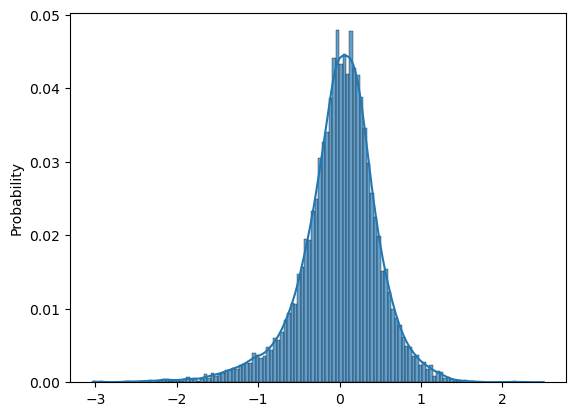

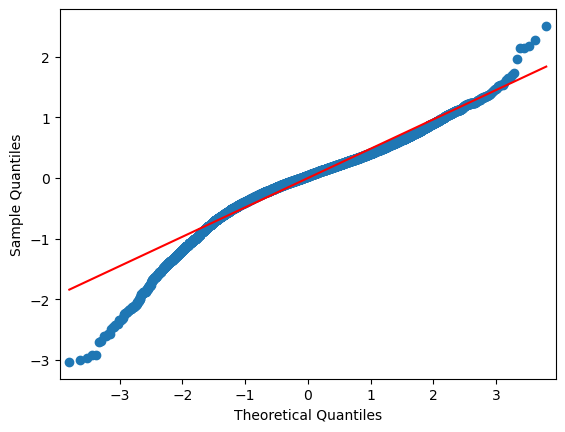

Shapiro-Wilk test on residuals: p-value = 0.000


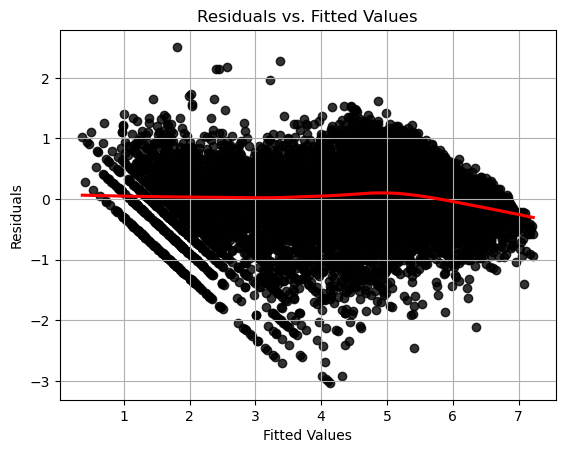

In [59]:
#Check Assumptions of Regression
################################
#Normality of residuals
########################
#Plot histogram of residuals
sns.histplot(lm3_t.resid, stat = 'probability', 
             kde = True, alpha = 0.7,)
########################
#QQ-plot
qqplot_lm = sm.qqplot(lm3_t.resid, line = 's')
plt.show()
########################
tstat, pval = stats.shapiro(lm3_t.resid)
print("Shapiro-Wilk test on residuals: p-value = {:4.3f}".format(pval))
########################
#Residuals vs. Fitted Values
sns.regplot(x = lm3_t.fittedvalues, y = lm3_t.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid()

Finding:
- It seems regression assumptions ( normality of residuals and homoscedasticity) are not perfectly met which means t-test results are not completely reliable for predictors selection.
- The distribution of residuals appears to be nearly normal.
- The QQ-plot does not provide strong evidence for the normality of residuals.
- The p-value of the Shapiro-Wilk test is zero, indicating that the residuals do not follow a normal distribution.
- From the scatter plot of Residuals vs. Fitted Values, heteroscedasticity presents in the data.

In [44]:
# prediction on test data using non linear regression model 

# X_test_modified is adjusted to match the columns present in X_train_modified. 
# This ensures that the columns used in the training data are consistently applied to the test data.
X_test_modified = X_test_modified[X_train_modified.columns]  
X_test_modified.head()

,const,yr_atemp_interaction,yr_season1_interaction,yr_season2_interaction,yr_mnth3_interaction,yr_mnth5_interaction,yr_mnth6_interaction,yr_mnth8_interaction,yr_weathersit3_interaction,yr_hr1_interaction,...,weekday5_hr17_interaction,weekday5_hr18_interaction,weekday5_hr19_interaction,weekday5_hr20_interaction,weekday5_hr21_interaction,weathersit3_hr1_interaction,weathersit3_hr2_interaction,weathersit3_hr3_interaction,weathersit3_hr4_interaction,weathersit3_hr16_interaction
5792,1.0,0.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7823,1.0,0.0000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15426,1.0,0.4697,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15028,1.0,0.4848,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,1.0,0.5758,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
# Compute prediction for both train and test applying non linear regression model
pred_test_lm3_t = lm3_t.predict(X_test_modified)
pred_train_lm3_t = lm3_t.predict(X_train_modified)

In [47]:
# compute evaluation metrics
# for test:
abs_err_lm3_t = abs(y_t_test - pred_test_lm3_t)/ y_t_test.mean()     # percentage Absolute Error 
pmae_test_lm3_t = np.mean(abs_err_lm3_t)                        # percentage Mean Absolute Error (PMAE)
prmse_test_lm3_t = np.sqrt(np.mean(abs_err_lm3_t**2))        # percentage Root Mean Squared Error (PRMSE)

# for train:
abs_err_lm3_t = abs(y_t_train - pred_train_lm3_t) / y_t_train.mean()       # percentage Absolute Error 
pmae_train_lm3_t = np.mean(abs_err_lm3_t)                             # percentage Mean Absolute Error (PMAE)
prmse_train_lm3_t = np.sqrt(np.mean(abs_err_lm3_t**2))            # percentage Root Mean Squared Error (PRMSE)


In [48]:
# append a new row of metrics values for non linear regression model to dataframe model_comp:
model_comp = model_comp.append(pd.DataFrame({'Target variable' : 'total count',
                                             'PMAE on train':    pmae_train_lm3_t,
                                            'PMAE on test':    pmae_test_lm3_t,
                                             'PRMSE on train' : prmse_train_lm3_t,
                                            'PRMSE on test' : prmse_test_lm3_t,
                                            'R-squared' : lm3_t.rsquared,
                                            'Adjusted R-squared' : lm3_t.rsquared_adj,
                                              }, index = ['Non Linear Regression']), 
                                             ignore_index = False)

model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627


Finding:
- The PMAE and PRMSE values for train dataset are very close to those for test dataset for Non Linear Regression.
- The R-squared and adj R-squared values are nearly identical for the two models.
- As expected, Non Linear Regression has better performnce that the linear one across the evaluated metrics.

### 5-3: Neural Network on y_t

Here, we apply Neural Network to model total count target variable y_t.

In [63]:
# set stopping criteria
callbacks = EarlyStopping(monitor='mean_absolute_error', min_delta=0.005, patience=5)

In [64]:
# Instantiate a Feed Forward neural network
model_NN_t = Sequential()

# dense layers
model_NN_t.add(tf.keras.layers.InputLayer(input_shape=(54,)))

model_NN_t.add(Dense(40, activation='relu'))
model_NN_t.add(Dense(20, activation='relu'))
model_NN_t.add(Dense(10, activation='relu'))

# Single node output as this is regression
model_NN_t.add(Dense(1)) # Default activation is linear, no need to define any activation function here

# Compile the model
model_NN_t.compile(optimizer=tf.keras.optimizers.Adam(), 
             loss=tf.keras.losses.MeanAbsoluteError(),
             metrics=[MeanAbsoluteError()])

In [65]:
# fit model
history = model_NN_t.fit(X_train,y_t_train, epochs=100, verbose=1, callbacks=[callbacks])
   
# Keep a running tally of the training history over ALL epochs
mae_list = []
mae_list = mae_list + history.history['mean_absolute_error']


Epoch 1/100
435/435 [==============================] - 4s 4ms/step - loss: 0.9305 - mean_absolute_error: 0.9305
Epoch 2/100
435/435 [==============================] - 2s 4ms/step - loss: 0.3591 - mean_absolute_error: 0.3591
Epoch 3/100
435/435 [==============================] - 2s 4ms/step - loss: 0.2724 - mean_absolute_error: 0.2724
Epoch 4/100
435/435 [==============================] - 2s 4ms/step - loss: 0.2512 - mean_absolute_error: 0.2512
Epoch 5/100
435/435 [==============================] - 1s 3ms/step - loss: 0.2418 - mean_absolute_error: 0.2418
Epoch 6/100
435/435 [==============================] - 1s 3ms/step - loss: 0.2379 - mean_absolute_error: 0.2379
Epoch 7/100
435/435 [==============================] - 2s 4ms/step - loss: 0.2289 - mean_absolute_error: 0.2289
Epoch 8/100
435/435 [==============================] - 1s 3ms/step - loss: 0.2287 - mean_absolute_error: 0.2287
Epoch 9/100
435/435 [==============================] - 1s 3ms/step - loss: 0.2253 - mean_absolute_error:

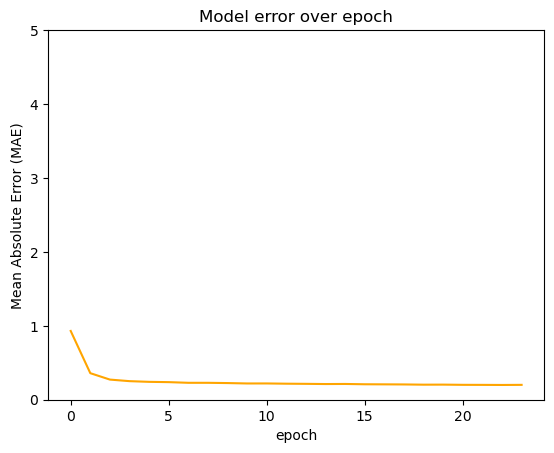

In [66]:
# mean_absolute_error for each epoch
plt.plot(mae_list, c='orange')
plt.ylim(0,5)
plt.title('Model error over epoch')
plt.xlabel('epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

In [67]:
# Compute prediction for both train and test applying Neural Network model
pred_test_NN = model_NN_t.predict(X_test)
pred_train_NN = model_NN_t.predict(X_train)

435/435 [==============================] - 1s 3ms/step


In [68]:
# compute evaluation metrics for Neural Network model
# for test:
abs_err_NN = abs(y_t_test - pred_test_NN.flatten())/ y_t_test.mean()       # Percentage Absolute Error 
pmae_test_NN = np.mean(abs_err_NN)                                   # Percentage Mean Absolute Error (PMAE)
prmse_test_NN = np.sqrt(np.mean(abs_err_NN**2))                  # Percentage Root Mean Squared Error (PRMSE)

# for train:
abs_err_NN = abs(y_t_train - pred_train_NN.flatten())/ y_t_test.mean()      # Percentage Absolute Error 
pmae_train_NN = np.mean(abs_err_NN)                                   # Percentage Mean Absolute Error (PMAE)
prmse_train_NN = np.sqrt(np.mean(abs_err_NN**2))                # Percentage Root Mean Squared Error (PRMSE)

In [69]:
# Calculate R-squared and Adjusted R-squared for train data
r2_train_NN = r2_score(y_t_train, pred_train_NN)
n_train, p_train = X_train.shape
adj_r2_train_NN = 1 - ((1 - r2_train_NN) * (n_train - 1)) / (n_train - p_train - 1)


In [70]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'total count',
                                             'PMAE on train': pmae_train_NN,
                                             'PMAE on test': pmae_test_NN,
                                             'PRMSE on train': prmse_train_NN,
                                             'PRMSE on test': prmse_test_NN,
                                             'R-squared': r2_train_NN,
                                             'Adjusted R-squared': adj_r2_train_NN},
                                            index=['Neural Network']),
                               ignore_index=False)
model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184


Finding:
- Neural Network model has better performnce that the two other ones across all the evaluated metrics.
- As expected, the PMAE and PRMSE values for train dataset are slightly lower than those for test dataset in Neural Network model.

### 5-4: Desion Tree on y_t

Here, we apply decision Tree Regressor to model total count target variable y_t.

In [71]:
# Define three hyperparameters to tune
param_grid ={
        'max_depth': [5, 10, 20,30,40],
        'min_samples_leaf': [2,5,10,15],
        'ccp_alpha': [0.001,0.01, 0.1]  # for regularization
            }

# Perform Grid Search with 5-fold cross-validation to find the best parameters
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
fittedgrid = grid_search.fit(X_train, y_t_train)

# Get the best parameters and the best model
best_params = fittedgrid.best_params_
best_model_p = fittedgrid.best_estimator_

print("Best Hyperparameters:")
print(best_params)

best_model_p.fit(X_train, y_t_train)
# report the train and test R squared
R_squared_train_t=best_model_p.score( X_train, y_t_train)
R_squared_test_t=best_model_p.score( X_test, y_t_test)

print(f'R-squared on train: {R_squared_train_t}')
print(f'R-squared on test: {R_squared_test_t}')


Best Hyperparameters:
{'ccp_alpha': 0.001, 'max_depth': 40, 'min_samples_leaf': 2}
R-squared on train: 0.8748334866025734
R-squared on test: 0.8517514549103655


In [77]:
# fit best decision Tree Regressor Model on and X_train and y_t_train based on the best values of hyperparameters obtained above. 
reg_tree = DecisionTreeRegressor(max_depth = 40, min_samples_leaf = 2, ccp_alpha = 0.001)
model_tree_t = reg_tree.fit(X_train, y_t_train)

In [78]:
# Compute prediction for both train and test applying decision Tree regressor
pred_test_tree = model_tree_t.predict(X_test)
pred_train_tree = model_tree_t.predict(X_train)

In [79]:
# compute evaluation metrics for decision Tree Regressor model
# for test:
abs_err_tree = abs(y_t_test - pred_test_tree) / y_t_test.mean()      # Percentage Absolute Error 
pmae_test_tree = np.mean(abs_err_tree)                           # Percentage Mean Absolute Error (PMAE)
prmse_test_tree = np.sqrt(np.mean(abs_err_tree**2))          # Percentage Root Mean Squared Error (PRMSE)

# for train:
abs_err_tree = abs(y_t_train - pred_train_tree) / y_t_train.mean()       #  Percentage Absolute Error 
pmae_train_tree = np.mean(abs_err_tree)                              # Percentage Mean Absolute Error (PMAE)
prmse_train_tree = np.sqrt(np.mean(abs_err_tree**2))            # Percentage Root Mean Squared Error (PRMSE)

In [80]:
# Calculate Adjusted R-squared for train data
n_train, p_train = X_train.shape
adj_r2_train_tree_t = 1 - ((1 - R_squared_train_t) * (n_train - 1)) / (n_train - p_train - 1)

In [83]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'total count',
                                            'PMAE on train': pmae_train_tree,
                                             'PMAE on test': pmae_test_tree,
                                             'PRMSE on train': prmse_train_tree,
                                             'PRMSE on test': prmse_test_tree,
                                             'R-squared': R_squared_train_t,
                                             'Adjusted R-squared': adj_r2_train_tree_t},
                                            index=['Decision Tree']),
                               ignore_index=False)
model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345


Finding:
- In dealing with the total count target variable, the Decision Tree model exhibits better performance compared to the Linear Regression model, and its performance is marginally inferior to that of the Nonlinear Regression model, and Neural Network.
- As expected, the PMAE and PRMSE values for train dataset are slightly lower than those for test dataset in Decision Tree model.

### Part 6: Modeling Casual Users Rentals

### 6-1: Linear Regression on y_c 
Lets begin with linear regression model on casual users rentals as target variable (y_c).

In [84]:
# fit Regression Model on y_c_train and X_train 
lm_c = sm.OLS(y_c_train, X_train).fit()   #instantiation and fitting 
print(lm_c.summary())                     #summarization

                            OLS Regression Results                            
Dep. Variable:               t_casual   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1271.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:32:29   Log-Likelihood:                -13098.
No. Observations:               13903   AIC:                         2.630e+04
Df Residuals:                   13850   BIC:                         2.670e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.3993      0.364      3.840      

The values of R-squared and adjusted R-squared are almost the same. The equality of these two metrics suggests the absence of overfitting. However, several predictors exhibit p-values greater than 0.05, indicating their lack of statistical significance. Consequently, these predictors should be removed from the model.

In [85]:
# #Check Multicollinearity by computing VIF 
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]
print(vif)  #If VIF > 10 then multicollinearity is high

       Variable      VIF
0         const  4661.21
1            yr     1.02
2       holiday      inf
3    workingday      inf
4          temp    57.66
5         atemp    49.73
6           hum     1.94
7     windspeed     1.25
8       season1     7.40
9       season2    10.48
10      season3     8.63
11        mnth1     3.13
12        mnth2     2.97
13        mnth3     3.17
14        mnth4     5.24
15        mnth5     6.05
16        mnth6     5.82
17        mnth7     6.73
18        mnth8     6.42
19        mnth9     4.15
20       mnth10     2.40
21       mnth11     2.17
22     weekday0     1.73
23     weekday1      inf
24     weekday2      inf
25     weekday3      inf
26     weekday4      inf
27     weekday5      inf
28  weathersit1  1049.24
29  weathersit2   900.43
30  weathersit3   343.50
31          hr0     1.93
32          hr1     1.94
33          hr2     1.94
34          hr3     1.93
35          hr4     1.90
36          hr5     1.93
37          hr6     1.96
38          hr7     1.94


Some variables have strong multicollinearity.

In [89]:
# here, we remove the predictors with p_value > 0.05 and the ones causing multicollinearity to build the modified model:
X_train_limited=X_train.drop(['weathersit3','season2','mnth2','temp','weekday4'],axis=1)

lm2_c = sm.OLS(y_c_train, X_train_limited).fit()      #instantiation and fitting 
print(lm2_c.summary())                                            #summarization

                            OLS Regression Results                            
Dep. Variable:               t_casual   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     1374.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:32:59   Log-Likelihood:                -13111.
No. Observations:               13903   AIC:                         2.632e+04
Df Residuals:                   13854   BIC:                         2.669e+04
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1821      0.057     20.711      

All the p-values are less than 0.05.

In [90]:
# computing VIF 
vif = pd.DataFrame()
vif["Variable"] = X_train_limited.columns
vif["VIF"] = [round(variance_inflation_factor(X_train_limited.values, i),2) for i in range(X_train_limited.shape[1])]
print(vif)

       Variable     VIF
0         const  116.91
1            yr    1.02
2       holiday    1.45
3    workingday    3.05
4         atemp    4.79
5           hum    1.92
6     windspeed    1.17
7       season1    3.41
8       season3    5.62
9         mnth1    1.60
10        mnth3    1.46
11        mnth4    2.19
12        mnth5    2.68
13        mnth6    3.31
14        mnth7    5.64
15        mnth8    5.29
16        mnth9    3.68
17       mnth10    2.20
18       mnth11    1.98
19     weekday0    1.73
20     weekday1    1.80
21     weekday2    1.71
22     weekday3    1.72
23     weekday5    1.72
24  weathersit1    4.02
25  weathersit2    3.43
26          hr0    1.93
27          hr1    1.94
28          hr2    1.94
29          hr3    1.93
30          hr4    1.90
31          hr5    1.93
32          hr6    1.96
33          hr7    1.94
34          hr8    1.95
35          hr9    1.95
36         hr10    1.93
37         hr11    1.98
38         hr12    1.99
39         hr13    2.03
40         hr14 

No multicollinearity is detected.

Now, lets check the assumption os regression model.

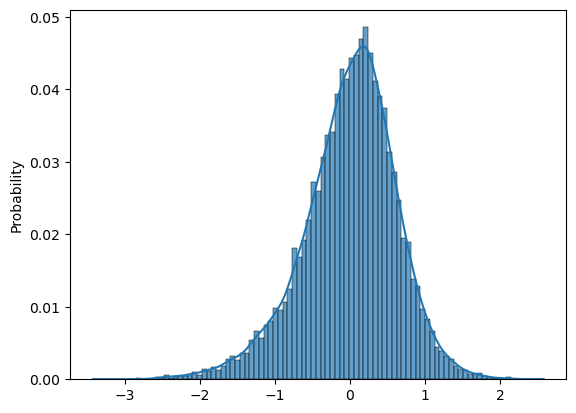

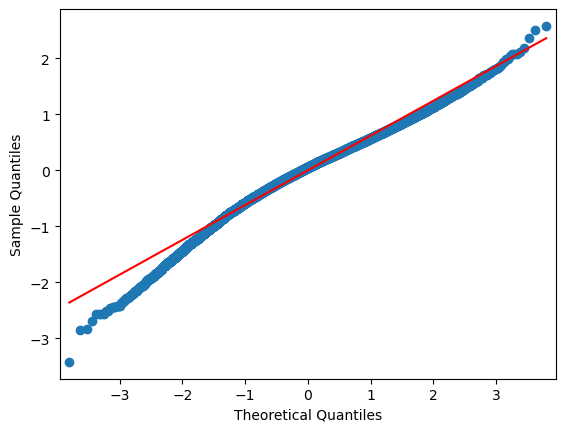

Shapiro-Wilk test on residuals: p-value = 0.000


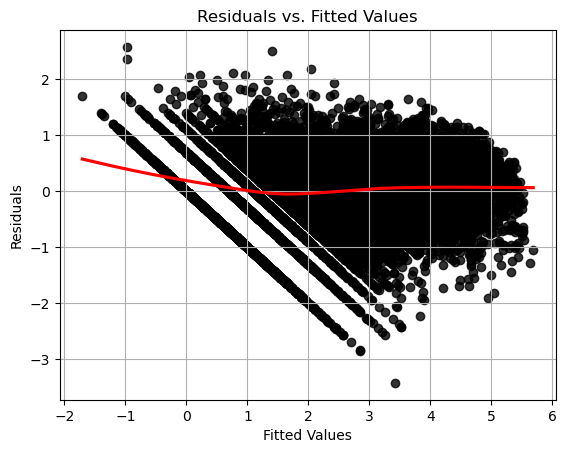

In [91]:
#Check Assumptions of Regression
################################
#Normality of residuals
########################
#Plot histogram of residuals
sns.histplot(lm2_c.resid, stat = 'probability', 
             kde = True, alpha = 0.7,)
########################
#QQ-plot
qqplot_lm = sm.qqplot(lm2_c.resid, line = 's')
plt.show()
########################
tstat, pval = stats.shapiro(lm2_c.resid)
print("Shapiro-Wilk test on residuals: p-value = {:4.3f}".format(pval))
########################
#Residuals vs. Fitted Values
sns.regplot(x = lm2_c.fittedvalues, y = lm2_c.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid()

Finding:
- It seems regression assumptions ( normality of residuals and homoscedasticity) are not perfectly met which means t-test results are not completely reliable for predictors selection.
- The distribution of residuals appears to be nearly normal.
- The QQ-plot does not provide strong evidence for the normality of residuals.
- The p-value of the Shapiro-Wilk test is zero, indicating that the residuals do not follow a normal distribution.
- From the scatter plot of Residuals vs. Fitted Values, heteroscedasticity presents in the data.

In [95]:
# prediction on test data using Linear model for casual users rentals y_c

#  X_test_limited is adjusted to match the columns present in X_train_limited. 
X_test_limited=X_test.drop(['weathersit3','season2','mnth2','temp','weekday4'],axis=1)

pred_test_lm2_c = lm2_c.predict(X_test_limited)      # prediction for test
pred_train_lm2_c = lm2_c.predict(X_train_limited)    # prediction for train

In [96]:
# compute evaluation metrics
# for test:
abs_err_lm2_c = abs(y_c_test - pred_test_lm2_c) / y_c_test.mean()     # Percentage Absolute Error 
pmae_test_lm2_c = np.mean(abs_err_lm2_c)                        # Percentage Mean Absolute Error (PMAE)
prmse_test_lm2_c = np.sqrt(np.mean(abs_err_lm2_c**2))        # Percentage Root Mean Squared Error (PRMSE)

# for train:
abs_err_lm2_c = abs(y_c_train - pred_train_lm2_c) / y_c_train.mean()      # Percentage Absolute Error 
pmae_train_lm2_c = np.mean(abs_err_lm2_c)                         # Percentage Mean Absolute Error (PMAE)
prmse_train_lm2_c = np.sqrt(np.mean(abs_err_lm2_c**2))          # Percentage Root Mean Squared Error (PRMSE)

In [97]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable' : 'casual',
                                             'PMAE on train':    pmae_train_lm2_c,
                                            'PMAE on test':    pmae_test_lm2_c,
                                             'PRMSE on train' : prmse_train_lm2_c,
                                            'PRMSE on test' : prmse_test_lm2_c, 
                                            'R-squared' : lm2_c.rsquared,
                                            'Adjusted R-squared' : lm2_c.rsquared_adj,
                                              }, index = ['Linear Regression']), 
                                             ignore_index = False)

model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.825790


Finding:
- The PMAE and PRMSE values for train dataset are slightly lower than those for test dataset.
- The R-squared and adj R-squared values are nearly identical. These values are almost the same as those in applying LR for `cnt`.

### 6-2: Non Linear Regression on y_c 

Here, to enhance the model's performance, we introduce additional interaction and squared variables into our regression model.

In [98]:
# we are going to utilize the statistically significant predictors identified within the linear regression model.
X_train_modified=X_train_limited.copy()
X_test_modified=X_test_limited.copy()

In [99]:
# here, all the possible interaction and squared variables are added to the train and test data.
import itertools
# List of columns for interactions
columns = X_train_modified.columns

# Generate all possible pairs of interactions
interaction_pairs = list(itertools.combinations(columns, 2))

# Loop through interaction pairs and create new columns
for interaction in interaction_pairs:
    var1, var2 = interaction
    new_column_name = f'{var1}_{var2}_interaction'
    X_train_modified[new_column_name] = X_train_modified[var1] * X_train_modified[var2]
    X_test_modified[new_column_name] = X_test_modified[var1] * X_test_modified[var2]

In [100]:
X_train_modified.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season1,season3,mnth1,...,hr18_hr19_interaction,hr18_hr20_interaction,hr18_hr21_interaction,hr18_hr22_interaction,hr19_hr20_interaction,hr19_hr21_interaction,hr19_hr22_interaction,hr20_hr21_interaction,hr20_hr22_interaction,hr21_hr22_interaction
2837,1.0,0,0,1,0.5152,0.83,0.2836,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15553,1.0,1,0,1,0.5303,0.73,0.2985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1931,1.0,0,0,0,0.1818,0.55,0.1940,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5233,1.0,0,0,1,0.6515,0.37,0.0896,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11900,1.0,1,0,1,0.5455,0.88,0.1343,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Utilizing a backward elimination process, we systematically remove predictors with insignificance (p-value > 0.05) 
from the models. In a loop defined for this purpose, the regression model is iteratively fitted to the training data
until all predictors with insignificance have been eliminated.

In [101]:
# Initialize the loop
while True:
    # Fit the linear regression model
    lm3_c = sm.OLS(y_c_train, X_train_modified).fit()
    
    # Get the p-values for each feature
    p_values = lm3_c.pvalues
    
    # Find interactions with p-values greater than 0.05 or NaN
    non_significant_interactions = p_values[(p_values >= 0.05) | p_values.isna()]
    
    # If no non-significant interactions remain, exit the loop
    if non_significant_interactions.empty:
        break
    
    # Drop non-significant interactions from X_train_modified
    X_train_modified = X_train_modified.drop(non_significant_interactions.index, axis=1)

# Print the final summary of the model
print(lm3_c.summary())


                            OLS Regression Results                            
Dep. Variable:               t_casual   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:                     399.1
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:36:24   Log-Likelihood:                -10247.
No. Observations:               13903   AIC:                         2.102e+04
Df Residuals:                   13639   BIC:                         2.301e+04
Df Model:                         263                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

All the p-values are less than 0.05.

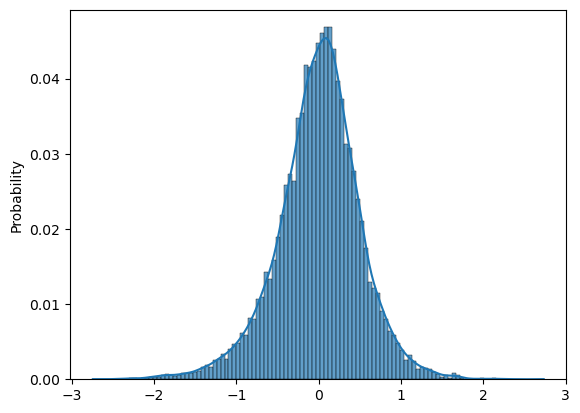

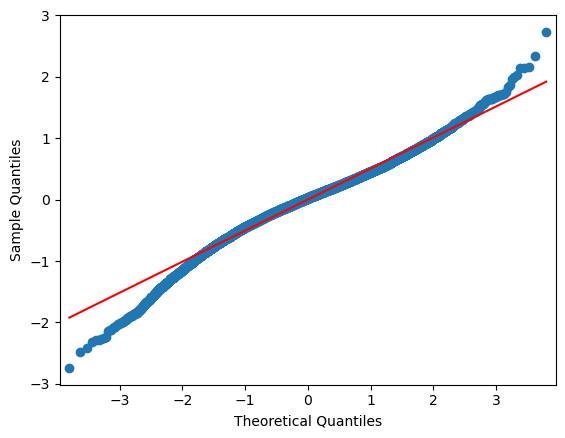

Shapiro-Wilk test on residuals: p-value = 0.000


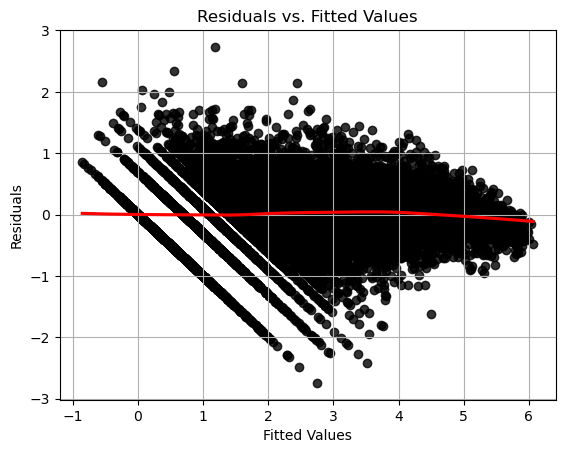

In [90]:
#Check Assumptions of Regression
################################
#Normality of residuals
########################
#Plot histogram of residuals
sns.histplot(lm3_c.resid, stat = 'probability', 
             kde = True, alpha = 0.7,)
########################
#QQ-plot
qqplot_lm = sm.qqplot(lm3_c.resid, line = 's')
plt.show()
########################
tstat, pval = stats.shapiro(lm3_c.resid)
print("Shapiro-Wilk test on residuals: p-value = {:4.3f}".format(pval))
########################
#Residuals vs. Fitted Values
sns.regplot(x = lm3_c.fittedvalues, y = lm3_c.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid()

Finding:
- It seems regression assumptions ( normality of residuals and homoscedasticity) are not perfectly met which means t-test results are not completely reliable for predictors selection.
- The distribution of residuals appears to be nearly normal.
- The QQ-plot does not provide strong evidence for the normality of residuals.
- The p-value of the Shapiro-Wilk test is zero, indicating that the residuals do not follow a normal distribution.
- From the scatter plot of Residuals vs. Fitted Values, heteroscedasticity presents in the data.

In [102]:
# prediction on test data using non linear regression model 

# X_test_modified is adjusted to match the columns present in X_train_modified. 
# This ensures that the columns used in the training data are consistently applied to the test data.

X_test_modified = X_test_modified[X_train_modified.columns]
X_test_modified.head()

,const,workingday,atemp,hum,season1,season3,mnth3,mnth5,mnth6,mnth7,...,weathersit2_hr2_interaction,weathersit2_hr4_interaction,weathersit2_hr5_interaction,weathersit2_hr8_interaction,weathersit2_hr10_interaction,weathersit2_hr11_interaction,weathersit2_hr12_interaction,weathersit2_hr14_interaction,weathersit2_hr15_interaction,weathersit2_hr16_interaction
5792,1.0,0,0.6667,0.74,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7823,1.0,0,0.6212,0.43,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15426,1.0,1,0.4697,0.77,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15028,1.0,0,0.4848,0.51,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,1.0,1,0.5758,0.89,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
# compute predictions for both test and train applying Non Linear Regression model on y_c
pred_test_lm3_c = lm3_c.predict(X_test_modified)
pred_train_lm3_c = lm3_c.predict(X_train_modified)

In [105]:
# compute evaluation metrics
# for test:
abs_err_lm3_c = abs(y_c_test - pred_test_lm3_c) /y_c_test.mean()       # Percentage Absolute Error 
pmae_test_lm3_c = np.mean(abs_err_lm3_c)                         #  Percentage Mean Absolute Error (PMAE)
prmse_test_lm3_c = np.sqrt(np.mean(abs_err_lm3_c**2))          #  Percentage Root Mean Squared Error (PRMSE)

# for test:
abs_err_lm3_c = abs(y_c_train - pred_train_lm3_c) /y_c_train.mean()       #  Percentage Absolute Error 
pmae_train_lm3_c = np.mean(abs_err_lm3_c)                            #  Percentage Mean Absolute Error (PMAE)
prmse_train_lm3_c = np.sqrt(np.mean(abs_err_lm3_c**2))           #  Percentage Root Mean Squared Error (PRMSE)

In [106]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable' : 'casual',
                                             'PMAE on train':    pmae_train_lm3_c,
                                            'PMAE on test':    pmae_test_lm3_c,
                                             'PRMSE on train' : prmse_train_lm3_c,
                                            'PRMSE on test' : prmse_test_lm3_c,
                                            'R-squared' : lm3_c.rsquared,
                                            'Adjusted R-squared' : lm3_c.rsquared_adj,
                                              }, index = ['Non Linear Regression']), 
                                             ignore_index = False)

model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.825790
Non Linear Regression,casual,0.140580,0.147467,0.186745,0.195456,0.885009,0.882792


Finding:
- Non Linear Regression show better performance than Linear Regression in terms of R-squared, Adjusted R-squared, and PMAE and PRMSE for both tran and test.
- PMAE and PRMSE values for train are slightly lower than those obtained for test dataset.

### 6-3: Neural Network on y_c

Here, we apply Neural Network to model casual users rentals variable y_c.

In [108]:
# set stopping criteria
callbacks = EarlyStopping(monitor='mean_absolute_error', min_delta=0.001, patience=5)

In [109]:
# Instantiate a Feed Forward neural network
model_NN_c = Sequential()

# dense layers
model_NN_c.add(tf.keras.layers.InputLayer(input_shape=(54,)))

model_NN_c.add(Dense(40, activation='relu'))
model_NN_c.add(Dense(20, activation='relu'))
model_NN_c.add(Dense(10, activation='relu'))

# Single node output as this is regression
model_NN_c.add(Dense(1)) # Default activation is linear, no need to define any activation function here

# Compile the model
model_NN_c.compile(optimizer=tf.keras.optimizers.Adam(), 
             loss=tf.keras.losses.MeanAbsoluteError(),
             metrics=[MeanAbsoluteError()])

In [110]:
# fit model
history = model_NN_c.fit(X_train,y_c_train, epochs=100, verbose=1, callbacks=[callbacks])
   
# Keep a running tally of the training history over ALL epochs
mae_list = []
mae_list = mae_list + history.history['mean_absolute_error']


Epoch 1/100
435/435 [==============================] - 3s 3ms/step - loss: 0.7676 - mean_absolute_error: 0.7676
Epoch 2/100
435/435 [==============================] - 1s 3ms/step - loss: 0.4452 - mean_absolute_error: 0.4452
Epoch 3/100
435/435 [==============================] - 1s 3ms/step - loss: 0.4157 - mean_absolute_error: 0.4157
Epoch 4/100
435/435 [==============================] - 1s 3ms/step - loss: 0.4009 - mean_absolute_error: 0.4009
Epoch 5/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3935 - mean_absolute_error: 0.3935
Epoch 6/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3885 - mean_absolute_error: 0.3885
Epoch 7/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3822 - mean_absolute_error: 0.3822
Epoch 8/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3806 - mean_absolute_error: 0.3806
Epoch 9/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3783 - mean_absolute_error:

435/435 [==============================] - 1s 3ms/step - loss: 0.3117 - mean_absolute_error: 0.3117
Epoch 74/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3092 - mean_absolute_error: 0.3092
Epoch 75/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3116 - mean_absolute_error: 0.3116
Epoch 76/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3105 - mean_absolute_error: 0.3105
Epoch 77/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3097 - mean_absolute_error: 0.3097
Epoch 78/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3081 - mean_absolute_error: 0.3081
Epoch 79/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3108 - mean_absolute_error: 0.3108
Epoch 80/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3088 - mean_absolute_error: 0.3088
Epoch 81/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3095 - mean_absolute_error: 0.3

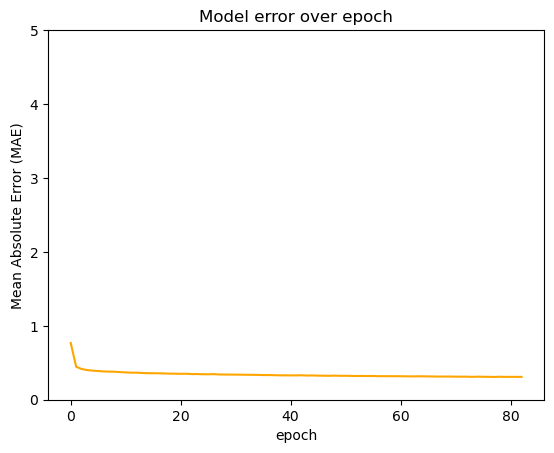

In [113]:
# mean_absolute_error for each epoch
plt.plot(mae_list, c='orange')
plt.ylim(0,5)
plt.title('Model error over epoch')
plt.xlabel('epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

In [114]:
# compute predictions for both test and train datasets applying Neural Network model
pred_test_NN_c = model_NN_c.predict(X_test)
pred_train_NN_c = model_NN_c.predict(X_train)

435/435 [==============================] - 1s 3ms/step


In [115]:
# compute evaluation metrics applying Neural Network model
# for test:
abs_err_NN = abs(y_c_test - pred_test_NN_c.flatten())/ y_c_test.mean()       # Percentage Absolute Error 
pmae_test_NN_c = np.mean(abs_err_NN)                                    # Percentage Mean Absolute Error (PMAE)
prmse_test_NN_c = np.sqrt(np.mean(abs_err_NN**2))                    # Percentage Root Mean Squared Error (PRMSE)

# for train:
abs_err_NN = abs(y_c_train - pred_train_NN_c.flatten())/ y_c_train.mean()        # Percentage Absolute Error 
pmae_train_NN_c = np.mean(abs_err_NN)                                       # Percentage Mean Absolute Error (PMAE)
prmse_train_NN_c = np.sqrt(np.mean(abs_err_NN**2))                    # Percentage Root Mean Squared Error (PRMSE)

In [116]:
# Calculate R-squared and Adjusted R-squared for train data
r2_train_NN_c = r2_score(y_c_train, pred_train_NN_c)
n_train, p_train = X_train.shape
adj_r2_train_NN_c = 1 - ((1 - r2_train_NN_c) * (n_train - 1)) / (n_train - p_train - 1)

In [117]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'casual',
                                             'PMAE on train': pmae_train_NN_c,
                                             'PMAE on test': pmae_test_NN_c,
                                             'PRMSE on train': prmse_train_NN_c,
                                             'PRMSE on test': prmse_test_NN_c,
                                             'R-squared': r2_train_NN_c,
                                             'Adjusted R-squared': adj_r2_train_NN_c},
                                            index=['Neural Network']),
                               ignore_index=False)
model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.825790
Non Linear Regression,casual,0.140580,0.147467,0.186745,0.195456,0.885009,0.882792
Neural Network,casual,0.109798,0.142504,0.161235,0.194997,0.914280,0.913946


Finding:
- As expected, Neural Network model has better performnce that the two other ones across all the evaluated metrics in modeling y_c.
- The PMAE and PRMSE values for train dataset are lower than those for test dataset for Neural Network modeL which could be regarded as overfitting.

### 6-4: Desion Tree on y_c

Here, we apply decision Tree Regressor to model casual users target variable y_c.

In [118]:
# Define three hyperparameters to tune
param_grid ={
        'max_depth': [5, 10, 20,30,40],
        'min_samples_leaf': [2,5,10,15],
        'ccp_alpha': [0.001,0.01, 0.1]  # for regularization
            }

# Perform Grid Search with 5-fold cross-validation to find the best parameters
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
fittedgrid = grid_search.fit(X_train, y_c_train)

# Get the best parameters and the best model
best_params = fittedgrid.best_params_
best_model_p = fittedgrid.best_estimator_

print("Best Hyperparameters:")
print(best_params)

best_model_p.fit(X_train, y_c_train)
# report the train and test R squared
R_squared_train_c=best_model_p.score( X_train, y_c_train)
R_squared_test_c=best_model_p.score( X_test, y_c_test)

print(f'R-squared on train: {R_squared_train_c}')
print(f'R-squared on test: {R_squared_test_c}')


Best Hyperparameters:
{'ccp_alpha': 0.001, 'max_depth': 20, 'min_samples_leaf': 2}
R-squared on train: 0.8082238078972221
R-squared on test: 0.7780227935734326


In [119]:
# fit best decision Tree Regressor Model on and X_train and y_c_train based on the best values of hyperparameters obtained above. 
reg_tree = DecisionTreeRegressor(max_depth = 20, min_samples_leaf = 2, ccp_alpha = 0.001)
model_tree_c = reg_tree.fit(X_train, y_c_train)

In [120]:
# Compute prediction for both train and test applying decision Tree regressor
pred_test_tree_c = model_tree_c.predict(X_test)
pred_train_tree_c = model_tree_c.predict(X_train)

In [121]:
# compute evaluation metrics for decision Tree Regressor model
# for test:
abs_err_tree = abs(y_c_test - pred_test_tree) /y_c_test.mean()       # Percentage Absolute Error 
pmae_test_tree = np.mean(abs_err_tree)                         # Percentage Mean Absolute Error (PMAE)
prmse_test_tree = np.sqrt(np.mean(abs_err_tree**2))           # Percentage Root Mean Squared Error (PRMSE)

# for train:
abs_err_tree = abs(y_c_train - pred_train_tree) /y_c_train.mean()      # Percentage Absolute Error 
pmae_train_tree = np.mean(abs_err_tree)                         # Percentage Mean Absolute Error (PMAE)
prmse_train_tree = np.sqrt(np.mean(abs_err_tree**2))            # Percentage Root Mean Squared Error (PRMSE)

In [122]:
# Calculate Adjusted R-squared for train data
n_train, p_train = X_train.shape
adj_r2_train_tree_c = 1 - ((1 - R_squared_train_c) * (n_train - 1)) / (n_train - p_train - 1)

In [123]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'casual',
                                             'PMAE on train': pmae_train_tree,
                                             'PMAE on test': pmae_test_tree,
                                             'PRMSE on train': prmse_train_tree,
                                             'PRMSE on test': prmse_test_tree,
                                             'R-squared': R_squared_train_c,
                                             'Adjusted R-squared': adj_r2_train_tree_c},
                                            index=['Decision Tree']),
                               ignore_index=False)
model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.825790
Non Linear Regression,casual,0.140580,0.147467,0.186745,0.195456,0.885009,0.882792
Neural Network,casual,0.109798,0.142504,0.161235,0.194997,0.914280,0.913946
Decision Tree,casual,0.690814,0.700642,0.765395,0.776075,0.808224,0.807476


Finding:
- In dealing with the casual users rentals variable, the Decision Tree model does not show promising performance compared to the other models.
- As expected, the PMAE and PRMSE values for train and test dataset are almost the same in Decision Tree model.

### Part 7: Modeling Registered Users Rentals as Target Variable

### 7-1: Linear Regression on y_r 
Lets begin with linear regression model on registered users rental bikes (y_r).

In [124]:
# fit Regression Model on y_r_train and X_train 
lm_r = sm.OLS(y_r_train, X_train).fit()   #instantiation and fitting 
print(lm_r.summary())                     #summarization

                            OLS Regression Results                            
Dep. Variable:           t_registered   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.813
Method:                 Least Squares   F-statistic:                     1166.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:45:33   Log-Likelihood:                -12727.
No. Observations:               13903   AIC:                         2.556e+04
Df Residuals:                   13850   BIC:                         2.596e+04
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.7196      0.355     10.482      

The values of R-squared and adjusted R-squared are almost the same. The equality of these two metrics suggests the absence of overfitting. However, several predictors exhibit p-values greater than 0.05, indicating their lack of statistical significance. Consequently, these predictors should be removed from the model.

In [125]:
# #Check Multicollinearity by computing VIF 
vif = pd.DataFrame()
vif["Variable"] = X_train.columns
vif["VIF"] = [round(variance_inflation_factor(X_train.values, i),2) for i in range(X_train.shape[1])]
print(vif)  #If VIF > 10 then multicollinearity is high

       Variable      VIF
0         const  4661.21
1            yr     1.02
2       holiday      inf
3    workingday      inf
4          temp    57.66
5         atemp    49.73
6           hum     1.94
7     windspeed     1.25
8       season1     7.40
9       season2    10.48
10      season3     8.63
11        mnth1     3.13
12        mnth2     2.97
13        mnth3     3.17
14        mnth4     5.24
15        mnth5     6.05
16        mnth6     5.82
17        mnth7     6.73
18        mnth8     6.42
19        mnth9     4.15
20       mnth10     2.40
21       mnth11     2.17
22     weekday0     1.73
23     weekday1      inf
24     weekday2      inf
25     weekday3      inf
26     weekday4      inf
27     weekday5      inf
28  weathersit1  1049.24
29  weathersit2   900.43
30  weathersit3   343.50
31          hr0     1.93
32          hr1     1.94
33          hr2     1.94
34          hr3     1.93
35          hr4     1.90
36          hr5     1.93
37          hr6     1.96
38          hr7     1.94


Some variables have strong multicollinearity. 

In [126]:
# here, we remove the predictors with p_value > 0.05 and the ones wit VIF>10 to build the modified model
X_train_limited=X_train.drop(['weathersit3','season2','mnth1','mnth3','mnth11','mnth8','temp','weekday4'],axis=1)

lm2_r = sm.OLS(y_r_train, X_train_limited).fit()      #instantiation and fitting 
print(lm2_r.summary())                                            #summarization

                            OLS Regression Results                            
Dep. Variable:           t_registered   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.812
Method:                 Least Squares   F-statistic:                     1337.
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:45:43   Log-Likelihood:                -12772.
No. Observations:               13903   AIC:                         2.564e+04
Df Residuals:                   13857   BIC:                         2.598e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.1747      0.054     58.998      

All the p-values are less than 0.05.

In [112]:
# computing VIF 
vif = pd.DataFrame()
vif["Variable"] = X_train_limited.columns
vif["VIF"] = [round(variance_inflation_factor(X_train_limited.values, i),2) for i in range(X_train_limited.shape[1])]
print(vif)

       Variable     VIF
0         const  109.13
1            yr    1.02
2       holiday    1.44
3    workingday    3.04
4         atemp    3.59
5           hum    1.92
6     windspeed    1.17
7       season1    2.31
8       season3    3.00
9         mnth2    1.35
10        mnth4    1.38
11        mnth5    1.61
12        mnth6    1.54
13        mnth7    1.73
14        mnth9    1.37
15       mnth10    1.38
16     weekday0    1.73
17     weekday1    1.80
18     weekday2    1.71
19     weekday3    1.72
20     weekday5    1.72
21  weathersit1    4.02
22  weathersit2    3.42
23          hr0    1.93
24          hr1    1.94
25          hr2    1.94
26          hr3    1.93
27          hr4    1.90
28          hr5    1.93
29          hr6    1.96
30          hr7    1.94
31          hr8    1.95
32          hr9    1.95
33         hr10    1.93
34         hr11    1.98
35         hr12    1.98
36         hr13    2.02
37         hr14    2.05
38         hr15    2.04
39         hr16    2.04
40         hr17 

No multicollinearity is detected.

Now, we check the regression model assumptions as follows:

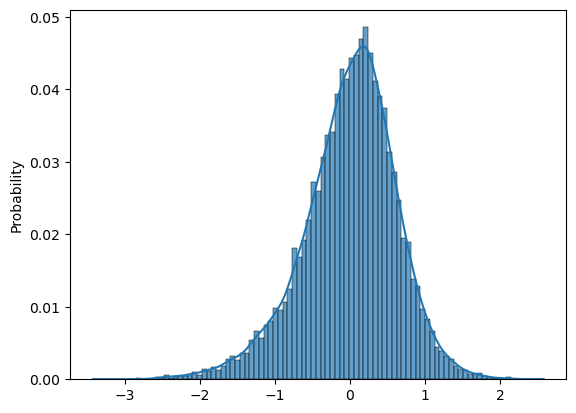

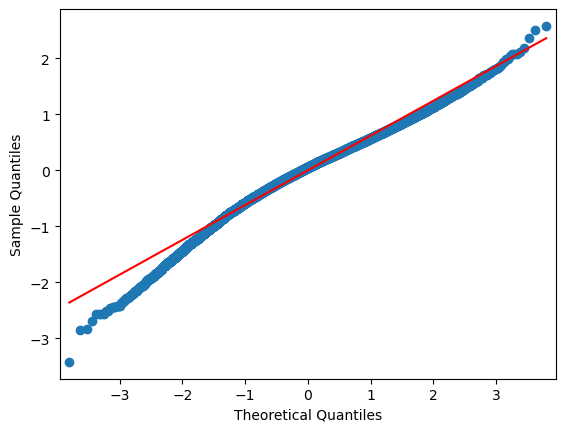

Shapiro-Wilk test on residuals: p-value = 0.000


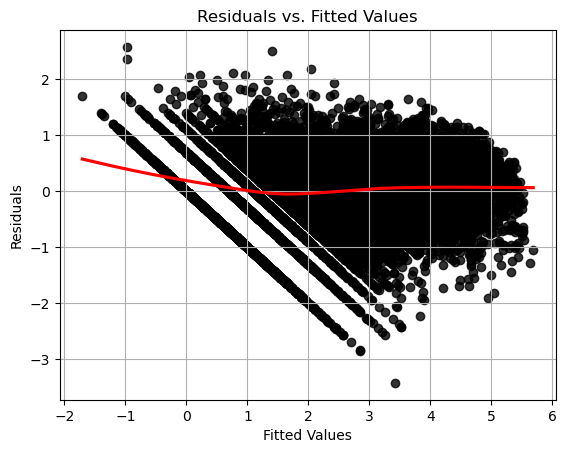

In [113]:
#Check Assumptions of Regression
################################
#Normality of residuals
########################
#Plot histogram of residuals
sns.histplot(lm2_c.resid, stat = 'probability', 
             kde = True, alpha = 0.7,)
########################
#QQ-plot
qqplot_lm = sm.qqplot(lm2_c.resid, line = 's')
plt.show()
########################
tstat, pval = stats.shapiro(lm2_c.resid)
print("Shapiro-Wilk test on residuals: p-value = {:4.3f}".format(pval))
########################
#Residuals vs. Fitted Values
sns.regplot(x = lm2_c.fittedvalues, y = lm2_c.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid()

Finding:
- It seems regression assumptions ( normality of residuals and homoscedasticity) are not perfectly met which means t-test results are not completely reliable for predictors selection.
- The distribution of residuals appears to be nearly normal.
- The QQ-plot does not provide strong evidence for the normality of residuals.
- The p-value of the Shapiro-Wilk test is zero, indicating that the residuals do not follow a normal distribution.
- From the scatter plot of Residuals vs. Fitted Values, heteroscedasticity presents in the data.

In [127]:
# prediction on test data using Linear model for y_r

# #  X_test_limited is adjusted to match the columns present in X_train_limited. 
X_test_limited=X_test.drop(['weathersit3','season2','mnth1','mnth3','mnth11','mnth8','temp','weekday4'],axis=1)

pred_test_lm2_r = lm2_r.predict(X_test_limited)
pred_train_lm2_r = lm2_r.predict(X_train_limited)

In [128]:
# compute evaluation metrics
# for test:
abs_err_lm2_r = abs(y_r_test - pred_test_lm2_r) /y_r_test.mean()       # Percentage Absolute Error 
pmae_test_lm2_r = np.mean(abs_err_lm2_r)               # Percentage Mean Absolute Error (PMAE)
prmse_test_lm2_r = np.sqrt(np.mean(abs_err_lm2_r**2))  # Percentage Root Mean Squared Error (PRMSE)

# for test:
abs_err_lm2_r = abs(y_r_train - pred_train_lm2_r)/y_r_train.mean()       # Percentage Absolute Error 
pmae_train_lm2_r = np.mean(abs_err_lm2_r)               # Percentage Mean Absolute Error (PMAE)
prmse_train_lm2_r = np.sqrt(np.mean(abs_err_lm2_r**2))  # Percentage Root Mean Squared Error (PRMSE)

In [129]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable' : 'registered',
                                            'PMAE on train':    pmae_train_lm2_r,
                                            'PMAE on test':    pmae_test_lm2_r,
                                            'PRMSE on train' : prmse_train_lm2_r,
                                            'PRMSE on test' : prmse_test_lm2_r,
                                            'R-squared' : lm2_r.rsquared,
                                            'Adjusted R-squared' : lm2_r.rsquared_adj,
                                              }, index = ['Linear Regression']), 
                                             ignore_index = False)

model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.825790
Non Linear Regression,casual,0.140580,0.147467,0.186745,0.195456,0.885009,0.882792
Neural Network,casual,0.109798,0.142504,0.161235,0.194997,0.914280,0.913946
Decision Tree,casual,0.690814,0.700642,0.765395,0.776075,0.808224,0.807476
Linear Regression,registered,0.103931,0.101321,0.138538,0.133469,0.812781,0.812173


Finding:
- The PMAE and PRMSE values for train dataset are almost the same which indicates the robustness of model performance.
- The R-squared and adj R-squared values are nearly identical.

### 7-2: Non Linear Regression on y_r 

Here, to enhance the model's performance, we introduce additional interaction and squared variables into our regression model.

In [130]:
# we are going to utilize the statistically significant predictors identified within the linear regression model.
X_train_modified=X_train_limited.copy()
X_test_modified=X_test_limited.copy()

In [131]:
# here, all the possible interaction and squared variables are added to the train and test data.
import itertools
# List of columns for interactions
columns = X_train_modified.columns

# Generate all possible pairs of interactions
interaction_pairs = list(itertools.combinations(columns, 2))

# Loop through interaction pairs and create new columns
for interaction in interaction_pairs:
    var1, var2 = interaction
    new_column_name = f'{var1}_{var2}_interaction'
    X_train_modified[new_column_name] = X_train_modified[var1] * X_train_modified[var2]
    X_test_modified[new_column_name] = X_test_modified[var1] * X_test_modified[var2]

In [119]:
# sanity check
X_train_modified.head()

,const,yr,holiday,workingday,atemp,hum,windspeed,season1,season3,mnth2,...,hr18_hr19_interaction,hr18_hr20_interaction,hr18_hr21_interaction,hr18_hr22_interaction,hr19_hr20_interaction,hr19_hr21_interaction,hr19_hr22_interaction,hr20_hr21_interaction,hr20_hr22_interaction,hr21_hr22_interaction
2837,1.0,0,0,1,0.5152,0.83,0.2836,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15553,1.0,1,0,1,0.5303,0.73,0.2985,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1931,1.0,0,0,0,0.1818,0.55,0.1940,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5233,1.0,0,0,1,0.6515,0.37,0.0896,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11900,1.0,1,0,1,0.5455,0.88,0.1343,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Utilizing a backward elimination process, we systematically remove predictors with insignificance (p-value > 0.05) 
from the models. In a loop defined for this purpose, the regression model is iteratively fitted to the training data
until all predictors with insignificance have been eliminated.

In [132]:
# Initialize the loop
while True:
    # Fit the linear regression model
    lm3_r = sm.OLS(y_r_train, X_train_modified).fit()
    
    # Get the p-values for each feature
    p_values = lm3_r.pvalues
    
    # Find interactions with p-values greater than 0.05 or NaN
    non_significant_interactions = p_values[(p_values >= 0.05) | p_values.isna()]
    
    # If no non-significant interactions remain, exit the loop
    if non_significant_interactions.empty:
        break
    
    # Drop non-significant interactions from X_train_modified
    X_train_modified = X_train_modified.drop(non_significant_interactions.index, axis=1)

# Print the final summary of the model
print(lm3_r.summary())


                            OLS Regression Results                            
Dep. Variable:           t_registered   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.904
Method:                 Least Squares   F-statistic:                     731.0
Date:                Thu, 17 Aug 2023   Prob (F-statistic):               0.00
Time:                        08:47:34   Log-Likelihood:                -8050.7
No. Observations:               13903   AIC:                         1.646e+04
Df Residuals:                   13723   BIC:                         1.782e+04
Df Model:                         179                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

All the p-values are less than 0.05.

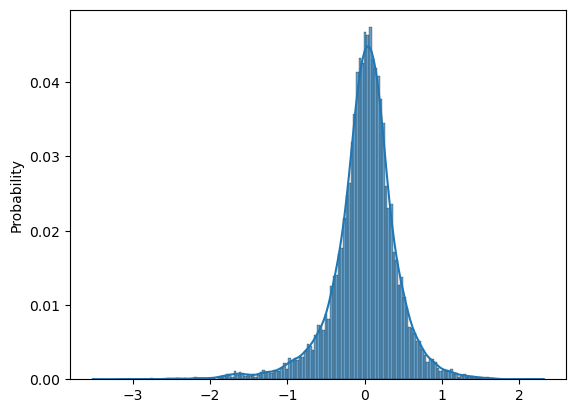

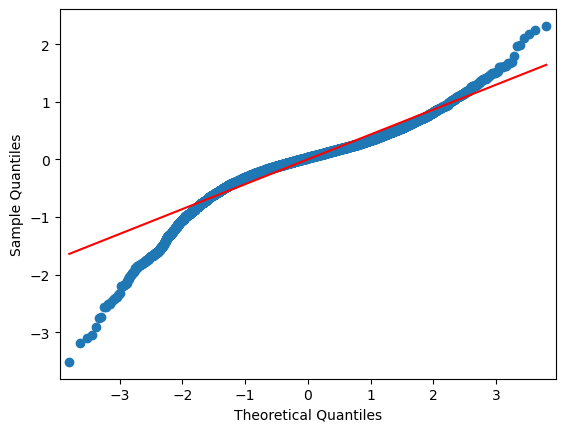

Shapiro-Wilk test on residuals: p-value = 0.000


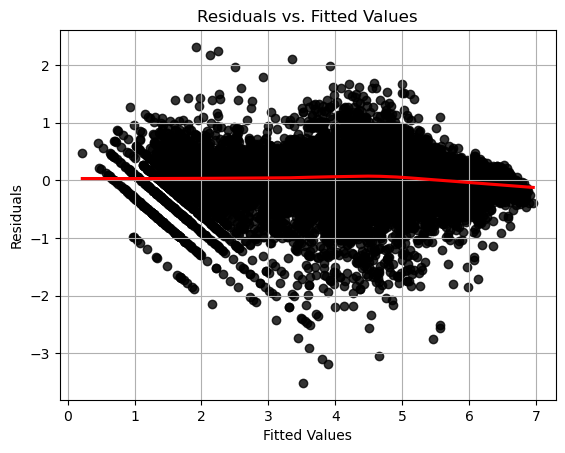

In [121]:
#Check Assumptions of Regression
################################
#Normality of residuals
########################
#Plot histogram of residuals
sns.histplot(lm3_r.resid, stat = 'probability', 
             kde = True, alpha = 0.7,)
########################
#QQ-plot
qqplot_lm = sm.qqplot(lm3_r.resid, line = 's')
plt.show()
########################
tstat, pval = stats.shapiro(lm3_r.resid)
print("Shapiro-Wilk test on residuals: p-value = {:4.3f}".format(pval))
########################
#Residuals vs. Fitted Values
sns.regplot(x = lm3_r.fittedvalues, y = lm3_r.resid, lowess = True, 
                       scatter_kws = {"color": "black"}, line_kws = {"color": "red"})
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values')
plt.grid()

Finding:
- It seems regression assumptions ( normality of residuals and homoscedasticity) are not perfectly met which means t-test results are not completely reliable for predictors selection.
- The distribution of residuals appears to be nearly normal.
- The QQ-plot does not provide strong evidence for the normality of residuals.
- The p-value of the Shapiro-Wilk test is zero, indicating that the residuals do not follow a normal distribution.
- From the scatter plot of Residuals vs. Fitted Values, heteroscedasticity presents in the data.

In [133]:
# prediction on test data using non linear regression model 

# X_test_modified is adjusted to match the columns present in X_train_modified. 
# This ensures that the columns used in the training data are consistently applied to the test data.
X_test_modified = X_test_modified[X_train_modified.columns]
X_test_modified.head()

,const,yr_season1_interaction,yr_mnth5_interaction,yr_weathersit1_interaction,yr_weathersit2_interaction,yr_hr1_interaction,yr_hr2_interaction,yr_hr3_interaction,yr_hr4_interaction,yr_hr7_interaction,...,weathersit1_hr1_interaction,weathersit1_hr2_interaction,weathersit1_hr3_interaction,weathersit1_hr4_interaction,weathersit1_hr5_interaction,weathersit2_hr1_interaction,weathersit2_hr2_interaction,weathersit2_hr3_interaction,weathersit2_hr4_interaction,weathersit2_hr5_interaction
5792,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7823,1.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15426,1.0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15028,1.0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12290,1.0,0,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# compute predictions for both train and test applying non linear regression model on y_r
pred_test_lm3_r = lm3_r.predict(X_test_modified)
pred_train_lm3_r = lm3_r.predict(X_train_modified)

In [136]:
# compute evaluation metrics
# for test:
abs_err_lm3_r = abs(y_r_test - pred_test_lm3_r) /y_r_test.mean()       # Percentage Absolute Error 
pmae_test_lm3_r = np.mean(abs_err_lm3_r)                             # Percentage Mean Absolute Error (PMAE)
prmse_test_lm3_r = np.sqrt(np.mean(abs_err_lm3_r**2))            # Percentage Root Mean Squared Error (PRMSE)

# for train:
abs_err_lm3_r = abs(y_r_train - pred_train_lm3_r) /y_r_train.mean()       # Percentage Absolute Error 
pmae_train_lm3_r = np.mean(abs_err_lm3_r)                            # Percentage Mean Absolute Error (PMAE)
prmse_train_lm3_r = np.sqrt(np.mean(abs_err_lm3_r**2))            # Percentage Root Mean Squared Error (PRMSE)

In [137]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable' : 'registered',
                                            'PMAE on train':    pmae_train_lm3_r,
                                            'PMAE on test':    pmae_test_lm3_r,
                                            'PRMSE on train' : prmse_train_lm3_r,
                                            'PRMSE on test' : prmse_test_lm3_r,
                                            'R-squared' : lm3_r.rsquared,
                                            'Adjusted R-squared' : lm3_r.rsquared_adj,
                                              }, index = ['Non Linear Regression']), 
                                             ignore_index = False)

model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.825790
Non Linear Regression,casual,0.140580,0.147467,0.186745,0.195456,0.885009,0.882792
Neural Network,casual,0.109798,0.142504,0.161235,0.194997,0.914280,0.913946
Decision Tree,casual,0.690814,0.700642,0.765395,0.776075,0.808224,0.807476
Linear Regression,registered,0.103931,0.101321,0.138538,0.133469,0.812781,0.812173
Non Linear Regression,registered,0.068300,0.070329,0.098647,0.100111,0.905075,0.903837


Finding:
- Non Linear Regression show better performance than Linear Regression in terms of R-squared, Adjusted R-squared, and test MAE and RMSE.
- As expected, PMAE and PRMSE values for test and train are nearly identical.

### 7-3: Neural Network on y_r

Here, we apply Neural Network to model registered users rentals variable y_r.

In [138]:
# set stopping criteria
callbacks = EarlyStopping(monitor='mean_absolute_error', min_delta=0.005, patience=5)

In [139]:
# Instantiate a Feed Forward neural network
model_NN_r = Sequential()

# dense layers
model_NN_r.add(tf.keras.layers.InputLayer(input_shape=(54,)))

model_NN_r.add(Dense(40, activation='relu'))
model_NN_r.add(Dense(20, activation='relu'))
model_NN_r.add(Dense(10, activation='relu'))

# Single node output as this is regression
model_NN_r.add(Dense(1)) # Default activation is linear, no need to define any activation function here

# Compile the model
model_NN_r.compile(optimizer=tf.keras.optimizers.Adam(), 
             loss=tf.keras.losses.MeanAbsoluteError(),
             metrics=[MeanAbsoluteError()])

In [140]:
# fit model
history = model_NN_r.fit(X_train,y_r_train, epochs=100, verbose=1, callbacks=[callbacks])
   
# Keep a running tally of the training history over ALL epochs
mae_list = []
mae_list = mae_list + history.history['mean_absolute_error']


Epoch 1/100
435/435 [==============================] - 3s 3ms/step - loss: 0.8754 - mean_absolute_error: 0.8754
Epoch 2/100
435/435 [==============================] - 1s 3ms/step - loss: 0.3322 - mean_absolute_error: 0.3322
Epoch 3/100
435/435 [==============================] - 1s 3ms/step - loss: 0.2482 - mean_absolute_error: 0.2482
Epoch 4/100
435/435 [==============================] - 2s 4ms/step - loss: 0.2396 - mean_absolute_error: 0.2396
Epoch 5/100
435/435 [==============================] - 1s 3ms/step - loss: 0.2304 - mean_absolute_error: 0.2304
Epoch 6/100
435/435 [==============================] - 1s 3ms/step - loss: 0.2251 - mean_absolute_error: 0.2251
Epoch 7/100
435/435 [==============================] - 1s 3ms/step - loss: 0.2230 - mean_absolute_error: 0.2230
Epoch 8/100
435/435 [==============================] - 1s 3ms/step - loss: 0.2193 - mean_absolute_error: 0.2193
Epoch 9/100
435/435 [==============================] - 2s 3ms/step - loss: 0.2179 - mean_absolute_error:

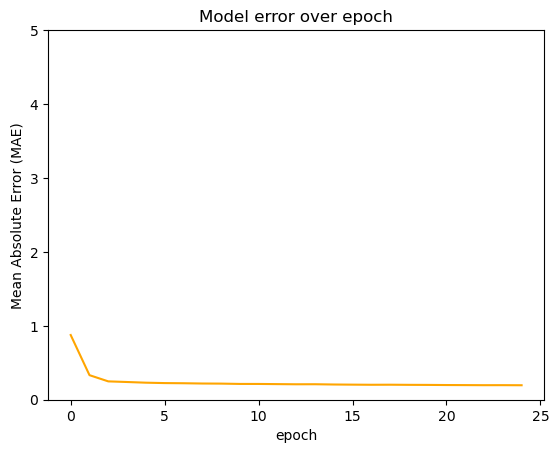

In [141]:
# mean_absolute_error for each epoch
plt.plot(mae_list, c='orange')
plt.ylim(0,5)
plt.title('Model error over epoch')
plt.xlabel('epoch')
plt.ylabel('Mean Absolute Error (MAE)')
plt.show()

In [142]:
# compute predictions for both test and train applying Neural Network model on y_r
pred_test_NN_r = model_NN_r.predict(X_test)
pred_train_NN_r = model_NN_r.predict(X_train)


435/435 [==============================] - 1s 3ms/step


In [143]:
# compute evaluation metrics
# for test:
abs_err_NN = abs(y_r_test - pred_test_NN_r.flatten())/y_r_test.mean()        # Percentage Absolute Error 
pmae_test_NN_r = np.mean(abs_err_NN)                                      # Percentage Mean Absolute Error (PMAE)
prmse_test_NN_r = np.sqrt(np.mean(abs_err_NN**2))                # Percentage Root Mean Squared Error (PRMSE)

# for train:
abs_err_NN = abs(y_r_train - pred_train_NN_r.flatten()) /y_r_train.mean()        # Percentage Absolute Error 
pmae_train_NN_r = np.mean(abs_err_NN)                                     # Percentage Mean Absolute Error (PMAE)
prmse_train_NN_r = np.sqrt(np.mean(abs_err_NN**2))                     # Percentage Root Mean Squared Error (PRMSE)

In [144]:
# Calculate R-squared and Adjusted R-squared for train data
r2_train_NN_r = r2_score(y_r_train, pred_train_NN_r)
n_train, p_train = X_train.shape
adj_r2_train_NN_r = 1 - ((1 - r2_train_NN_r) * (n_train - 1)) / (n_train - p_train - 1)

In [145]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'registered',
                                             'PMAE on train': pmae_train_NN_r,
                                             'PMAE on test': pmae_test_NN_r,
                                             'PRMSE on train': prmse_train_NN_r,
                                             'PRMSE on test': prmse_test_NN_r,    
                                             'R-squared': r2_train_NN_r,
                                             'Adjusted R-squared': adj_r2_train_NN_r},
                                            index=['Neural Network']),
                               ignore_index=False)
model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.825790
Non Linear Regression,casual,0.140580,0.147467,0.186745,0.195456,0.885009,0.882792
Neural Network,casual,0.109798,0.142504,0.161235,0.194997,0.914280,0.913946
Decision Tree,casual,0.690814,0.700642,0.765395,0.776075,0.808224,0.807476
Linear Regression,registered,0.103931,0.101321,0.138538,0.133469,0.812781,0.812173
Non Linear Regression,registered,0.068300,0.070329,0.098647,0.100111,0.905075,0.903837


Finding:
- As expected, Neural Network model has better performnce that the two other ones across all the evaluated metrics in modeling y_c.
- The PMAE and PRMSE values for train dataset are slightly lower than those for test dataset for Neural Network model which could be regarded as overfitting.

### 7-4: Desion Tree on y_r

Here, we apply decision Tree Regressor to model registered users target variable y_r.

In [146]:
# Define three hyperparameters to tune
param_grid ={
        'max_depth': [5, 10, 20,30,40],
        'min_samples_leaf': [2,5,10,15],
        'ccp_alpha': [0.001,0.01, 0.1]  # for regularization
            }

# Perform Grid Search with 5-fold cross-validation to find the best parameters
grid_search = GridSearchCV(DecisionTreeRegressor(), param_grid, cv=5)
fittedgrid = grid_search.fit(X_train, y_r_train)

# Get the best parameters and the best model
best_params = fittedgrid.best_params_
best_model_p = fittedgrid.best_estimator_

print("Best Hyperparameters:")
print(best_params)

best_model_p.fit(X_train, y_r_train)
# report the train and test R squared
R_squared_train_r=best_model_p.score( X_train, y_r_train)
R_squared_test_r=best_model_p.score( X_test, y_r_test)

print(f'R-squared on train: {R_squared_train_r}')
print(f'R-squared on test: {R_squared_test_r}')


Best Hyperparameters:
{'ccp_alpha': 0.001, 'max_depth': 30, 'min_samples_leaf': 2}
R-squared on train: 0.8793065856875776
R-squared on test: 0.8624755522584167


In [147]:
# fit best decision Tree Regressor Model on and X_train and y_r_train based on the best values of hyperparameters obtained above. 
reg_tree = DecisionTreeRegressor(max_depth = 40, min_samples_leaf = 5, ccp_alpha = 0.001)
model_tree_r = reg_tree.fit(X_train, y_r_train)

In [148]:
# Compute prediction for both train and test applying decision Tree regressor
pred_test_tree_r = model_tree_r.predict(X_test)
pred_train_tree_r = model_tree_r.predict(X_train)

In [149]:
# compute evaluation metrics for decision Tree Regressor model
# for test:
abs_err_tree = abs(y_r_test - pred_test_tree_r) / y_r_test.mean()     # Percentage Absolute Error 
pmae_test_tree = np.mean(abs_err_tree)                            # Percentage Mean Absolute Error (PMAE)
prmse_test_tree = np.sqrt(np.mean(abs_err_tree**2))           # Percentage Root Mean Squared Error (PRMSE)

# for train:
abs_err_tree = abs(y_r_train - pred_train_tree_r) / y_r_train.mean()       # Percentage Absolute Error 
pmae_train_tree = np.mean(abs_err_tree)                                # Percentage Mean Absolute Error (PMAE)
prmse_train_tree = np.sqrt(np.mean(abs_err_tree**2))               # Percentage Root Mean Squared Error (PRMSE)

In [150]:
# Calculate Adjusted R-squared for train data
n_train, p_train = X_train.shape
adj_r2_train_tree_r = 1 - ((1 - R_squared_train_r) * (n_train - 1)) / (n_train - p_train - 1)

In [151]:
# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'registered',
                                             'PMAE on train': pmae_train_tree,
                                             'PMAE on test': pmae_test_tree,
                                             'PRMSE on train': prmse_train_tree,
                                             'PRMSE on test':prmse_test_tree,
                                             'R-squared': R_squared_train_r,
                                             'Adjusted R-squared': adj_r2_train_tree_r},
                                            index=['Decision Tree']),
                               ignore_index=False)
# display model_comp
model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.825790
Non Linear Regression,casual,0.140580,0.147467,0.186745,0.195456,0.885009,0.882792
Neural Network,casual,0.109798,0.142504,0.161235,0.194997,0.914280,0.913946
Decision Tree,casual,0.690814,0.700642,0.765395,0.776075,0.808224,0.807476
Linear Regression,registered,0.103931,0.101321,0.138538,0.133469,0.812781,0.812173
Non Linear Regression,registered,0.068300,0.070329,0.098647,0.100111,0.905075,0.903837


Finding:
- In dealing with the registered users rentals variable, the Decision Tree model exhibits better performance compared to the Linear Regression model, and its performance is inferior to that of the Nonlinear Regression model, and Neural Network.
- As expected, the PMAE and PRMSE values for train and test dataset are very close in applying Decision Tree model.

In following cells, we predict the total count (cnt) target variables applying the proposed second approach. According to that we sum up the obtained predictions from the separate models for casual and registered users to compute the 'cnt' variable across all the developed models.

In [152]:
# Linear Regression Model
# computing prediction of cnt target variable by summing up casual users and registered users predictions.
total_pred_test_lm2=pred_test_lm2_r+ pred_test_lm2_c
total_pred_train_lm2=pred_train_lm2_r+ pred_train_lm2_c

# evaluation metrics for test:
abs_err_lm2 = abs(y_t_test - total_pred_test_lm2) / (y_c_test+y_r_test).mean()      # Percentage Absolute Error 
pmae_test_lm2 = np.mean(abs_err_lm2)                                      # Percentage Mean Absolute Error (PMAE)
prmse_test_lm2 = np.sqrt(np.mean(abs_err_lm2**2))                       # Percentage Root Mean Squared Error (PRMSE)

# evaluation metrics for train:
abs_err_lm2 = abs(y_t_train - total_pred_train_lm2) / (y_c_train+y_r_train).mean()      # Percentage Absolute Error 
pmae_train_lm2 = np.mean(abs_err_lm2)                                                 # Percentage Mean Absolute Error (PMAE)
prmse_train_lm2 = np.sqrt(np.mean(abs_err_lm2**2))                              # Percentage Root Mean Squared Error (PRMSE)

# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'casual + registered',
                                             'PMAE on train': pmae_train_lm2,
                                             'PMAE on test': pmae_test_lm2,
                                             'PRMSE on train': prmse_train_lm2,
                                             'PRMSE on test': prmse_test_lm2,    
                                             'R-squared': '-',
                                             'Adjusted R-squared': '-'},
                                            index=['Linear Model']),
                               ignore_index=False)
# display model_comp
model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.82579
Non Linear Regression,casual,0.140580,0.147467,0.186745,0.195456,0.885009,0.882792
Neural Network,casual,0.109798,0.142504,0.161235,0.194997,0.91428,0.913946
Decision Tree,casual,0.690814,0.700642,0.765395,0.776075,0.808224,0.807476
Linear Regression,registered,0.103931,0.101321,0.138538,0.133469,0.812781,0.812173
Non Linear Regression,registered,0.068300,0.070329,0.098647,0.100111,0.905075,0.903837


In [153]:
# Non Linear Regression Model
# computing prediction of cnt target variable by summing up casual users and registered users predictions.
total_pred_test_lm3=pred_test_lm3_r+ pred_test_lm3_c
total_pred_train_lm3=pred_train_lm3_r+ pred_train_lm3_c

# evaluation metrics for test:
abs_err_lm3 = abs(y_t_test - total_pred_test_lm3) / (y_c_test+y_r_test).mean()      # Percenatge Absolute Error 
pmae_test_lm3 = np.mean(abs_err_lm3)               # Percenatge Mean Absolute Error (PMAE)
prmse_test_lm3 = np.sqrt(np.mean(abs_err_lm3**2))  # Percenatge Root Mean Squared Error (PRMSE)

# evaluation metrics for train:
abs_err_lm3 = abs(y_t_train - total_pred_train_lm3) / (y_c_train+y_r_train).mean()      # Percenatge Absolute Error 
pmae_train_lm3 = np.mean(abs_err_lm3)               # Percenatge Mean Absolute Error (PMAE)
prmse_train_lm3 = np.sqrt(np.mean(abs_err_lm3**2))  # Percenatge Root Mean Squared Error (PRMSE)

# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'casual + registered',
                                             'PMAE on train': pmae_train_lm3,
                                             'PMAE on test': pmae_test_lm3,
                                             'PRMSE on train': prmse_train_lm3,
                                             'PRMSE on test': prmse_test_lm3,                                         
                                             'R-squared': '-',
                                             'Adjusted R-squared': '-'},
                                            index=['Non Linear Model']),
                               ignore_index=False)
# display model_comp
model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.82579
Non Linear Regression,casual,0.140580,0.147467,0.186745,0.195456,0.885009,0.882792
Neural Network,casual,0.109798,0.142504,0.161235,0.194997,0.91428,0.913946
Decision Tree,casual,0.690814,0.700642,0.765395,0.776075,0.808224,0.807476
Linear Regression,registered,0.103931,0.101321,0.138538,0.133469,0.812781,0.812173
Non Linear Regression,registered,0.068300,0.070329,0.098647,0.100111,0.905075,0.903837


In [154]:
# Neural Network Model
# computing prediction of cnt target variable by summing up casual users and registered users predictions.
total_pred_test_NN=pred_test_NN_r.flatten()+ pred_test_NN_c.flatten()
total_pred_train_NN=pred_train_NN_r.flatten()+ pred_train_NN_c.flatten()

# evaluation metrics for test:
abs_err_NN = abs(y_t_test - total_pred_test_NN) / (y_c_test+y_r_test).mean()       # Percentage Absolute Error 
pmae_test_NN = np.mean(abs_err_NN)               # Percentage Mean Absolute Error (PMAE)
prmse_test_NN = np.sqrt(np.mean(abs_err_NN**2))  # Percentage Root Mean Squared Error (PRMSE)

# evaluation metrics for train:
abs_err_NN = abs(y_t_train - total_pred_train_NN) / (y_c_train+y_r_train).mean()       # Percentage Absolute Error 
pmae_train_NN = np.mean(abs_err_NN)               # Percentage Mean Absolute Error (PMAE)
prmse_train_NN = np.sqrt(np.mean(abs_err_NN**2))  # Percentage Root Mean Squared Error (PRMSE)

# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'casual + registered',
                                             'PMAE on train': pmae_train_NN,
                                             'PMAE on test': pmae_test_NN,
                                             'PRMSE on train': prmse_train_NN,
                                             'PRMSE on test': prmse_test_NN,                                          
                                             'R-squared': '-',
                                             'Adjusted R-squared': '-'},
                                            index=['Neural Network']),
                               ignore_index=False)
# display model_comp
model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.82579
Non Linear Regression,casual,0.140580,0.147467,0.186745,0.195456,0.885009,0.882792
Neural Network,casual,0.109798,0.142504,0.161235,0.194997,0.91428,0.913946
Decision Tree,casual,0.690814,0.700642,0.765395,0.776075,0.808224,0.807476
Linear Regression,registered,0.103931,0.101321,0.138538,0.133469,0.812781,0.812173
Non Linear Regression,registered,0.068300,0.070329,0.098647,0.100111,0.905075,0.903837


In [155]:
# Decision Tree Regressor
# computing prediction of cnt target variable by summing up casual users and registered users predictions.
total_pred_test_tree=pred_test_tree_r+ pred_test_tree_c
total_pred_train_tree=pred_train_tree_r+ pred_train_tree_c

# evaluation metrics for test:
abs_err_tree = abs(y_t_test - total_pred_test_tree) / (y_c_test+y_r_test).mean()       # Percentage Absolute Error 
pmae_test_tree = np.mean(abs_err_tree)               # Percentage Mean Absolute Error (PMAE)
prmse_test_tree = np.sqrt(np.mean(abs_err_tree**2))  # Percentage Root Mean Squared Error (PRMSE)

# evaluation metrics for train:
abs_err_tree = abs(y_t_train - total_pred_train_tree)/(y_c_train+y_r_train).mean()        # Absolute Error 
pmae_train_tree = np.mean(abs_err_tree)               # Percentage Mean Absolute Error (PMAE)
prmse_train_tree = np.sqrt(np.mean(abs_err_tree**2))  # Percentage Root Mean Squared Error (PRMSE)

# Append the metrics to the model_comp DataFrame
model_comp = model_comp.append(pd.DataFrame({'Target variable': 'casual + registered',
                                             'PMAE on train': pmae_train_tree,
                                             'PMAE on test': pmae_test_tree,
                                             'PRMSE on train': prmse_train_tree,
                                             'PRMSE on test': prmse_test_tree,                                            
                                             'R-squared': '-',
                                             'Adjusted R-squared': '-'},
                                            index=['Decision Tree']),
                               ignore_index=False)
# display model_comp
model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.82579
Non Linear Regression,casual,0.140580,0.147467,0.186745,0.195456,0.885009,0.882792
Neural Network,casual,0.109798,0.142504,0.161235,0.194997,0.91428,0.913946
Decision Tree,casual,0.690814,0.700642,0.765395,0.776075,0.808224,0.807476
Linear Regression,registered,0.103931,0.101321,0.138538,0.133469,0.812781,0.812173
Non Linear Regression,registered,0.068300,0.070329,0.098647,0.100111,0.905075,0.903837


Comparing the PMAE and PRMSE values for the combined version with those for the total count target variable reveals that the approach of employing separate models for predicting casual and registered users and then summing them up yields lower performance compared to directly predicting the total count.

In [378]:
# Save DataFrame to Excel file
model_comp.to_excel('C:/Users/HP/Desktop/brainstation/projects/Capstone/Sprint 2/model_comp.xlsx', index=False)

In [156]:
# Here, we use the  magnitude of difference between PMAE on the training and test data as a sign of overfitting or underfittinghaving or robust result

diff_PMAE=model_comp['PMAE on train'] - model_comp['PMAE on test']

# determine fitting situation for each row in model_comp by comapring the percentage MAE difference with threshoold 0.001.
model_comp['fitting_situation'] = np.where(abs(diff_PMAE)<= 0.01, 'robust',
                                           np.where(np.logical_or(diff_PMAE > 0.01, diff_PMAE < -0.01),
                                                    'overfitting','underfitting'))

# display model_comp
model_comp

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared,fitting_situation
Linear Regression,total count,0.097186,0.094967,0.129485,0.124767,0.826325,0.825736,robust
Non Linear Regression,total count,0.076906,0.077513,0.105768,0.104828,0.884121,0.882627,robust
Neural Network,total count,0.045358,0.051338,0.067023,0.073281,0.953366,0.953184,robust
Decision Tree,total count,0.081945,0.087385,0.109925,0.118121,0.874833,0.874345,robust
Linear Regression,casual,0.176778,0.179640,0.229458,0.232404,0.826391,0.82579,robust
Non Linear Regression,casual,0.140580,0.147467,0.186745,0.195456,0.885009,0.882792,robust
Neural Network,casual,0.109798,0.142504,0.161235,0.194997,0.91428,0.913946,overfitting
Decision Tree,casual,0.690814,0.700642,0.765395,0.776075,0.808224,0.807476,robust
Linear Regression,registered,0.103931,0.101321,0.138538,0.133469,0.812781,0.812173,robust
Non Linear Regression,registered,0.068300,0.070329,0.098647,0.100111,0.905075,0.903837,robust


According to the above results, all the combinations of models and target variables are robust, except for predicting casual users rentals applying NN which can be regarded as overfitting.

In [157]:
# reverse log transformation on the evaluation metrics PMAE and PRMSE by applying exp function
model_comp_original=model_comp.copy()
model_comp_original.iloc[:,1:5]=np.exp(model_comp_original.iloc[:,1:5])-1
# display model_comp
model_comp_original

,Target variable,PMAE on train,PMAE on test,PRMSE on train,PRMSE on test,R-squared,Adjusted R-squared,fitting_situation
Linear Regression,total count,0.102065,0.099622,0.138242,0.132884,0.826325,0.825736,robust
Non Linear Regression,total count,0.079941,0.080596,0.111564,0.110520,0.884121,0.882627,robust
Neural Network,total count,0.046403,0.052678,0.069320,0.076033,0.953366,0.953184,robust
Decision Tree,total count,0.085396,0.091317,0.116194,0.125380,0.874833,0.874345,robust
Linear Regression,casual,0.193367,0.196786,0.257918,0.261629,0.826391,0.82579,robust
Non Linear Regression,casual,0.150941,0.158895,0.205320,0.215865,0.885009,0.882792,robust
Neural Network,casual,0.116053,0.153158,0.174961,0.215308,0.91428,0.913946,overfitting
Decision Tree,casual,0.995338,1.015047,1.149844,1.172927,0.808224,0.807476,robust
Linear Regression,registered,0.109524,0.106632,0.148593,0.142786,0.812781,0.812173,robust
Non Linear Regression,registered,0.070687,0.072861,0.103677,0.105293,0.905075,0.903837,robust


Similar result as log_transformed metrics in model_comp are obtained here only with different scale.

In [158]:
# Save DataFrame to Excel file
model_comp_original.to_excel('C:/Users/HP/Desktop/brainstation/projects/Capstone/Sprint 2/model_comp_original.xlsx', index=False)

In the following cells, we will visualize the results obtained from comparing the different models to have better insights.

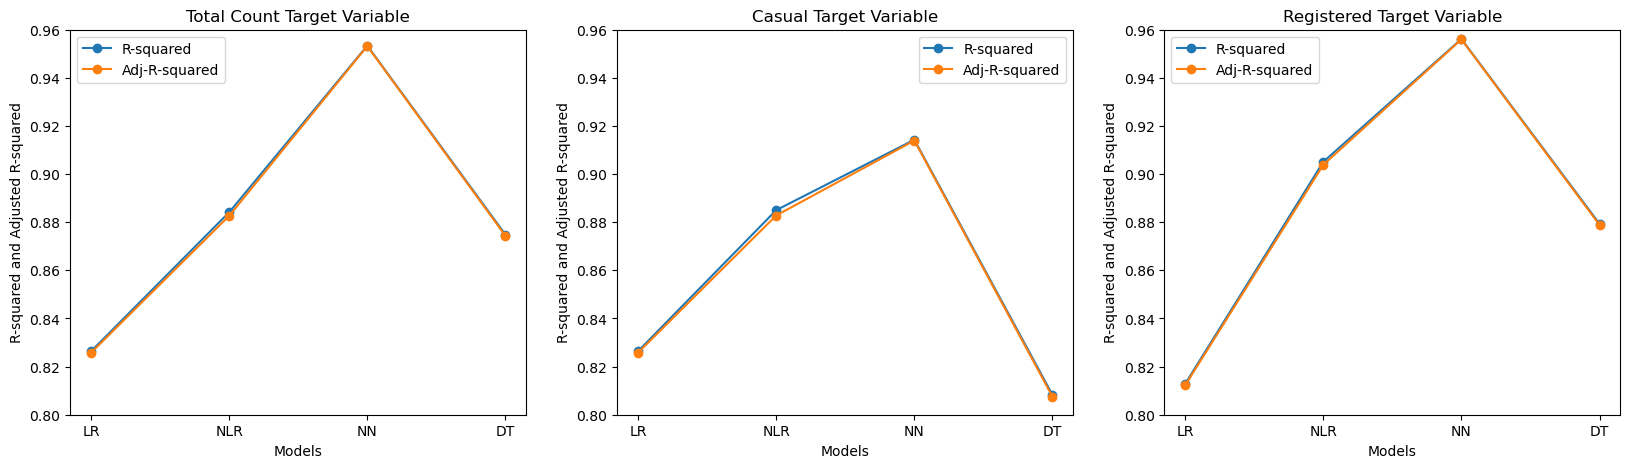

In [159]:
# visualize R-squared and Adjusted R-squared values for the models on the three target variables
model_list=['LR','NLR','NN','DT']
targets=['Total Count','Casual','Registered']
plt.subplots(1, 3, figsize=(20, 5))
i=1 # index for subplot
j=0 # index to extract data for each target variable
for column in targets:
    plt.subplot(1, 3, i)
    plt.plot(range(len(model_list)), model_comp['R-squared'][j:j+4], label='R-squared', marker='o')
    plt.plot(range(len(model_list)), model_comp['Adjusted R-squared'][j:j+4], label='Adj-R-squared', marker='o')
    plt.xticks(range(len(model_list)), model_list)  # Use integer indexing for x-axis ticks
    plt.xlabel("Models")
    plt.ylabel("R-squared and Adjusted R-squared")
    plt.ylim([0.8, 0.96])
    plt.title(f"{column} Target Variable")
    plt.legend()
    i += 1
    j=j+4
plt.show()  

Finding:

- The NN model stands out as the best performer, achieving results higher than 90% accuracy. It outshines the other models.

- The NLR model also delivers strong results, especially when predicting casual and registered rentals. It's effective in understanding these user groups.

- Both NLR and DT models excel at predicting the total count. They perform equally well in grasping the overall picture.

- The DT model struggles when predicting for casual users. Similarly, the LR model falls short when dealing with total count and registered users.

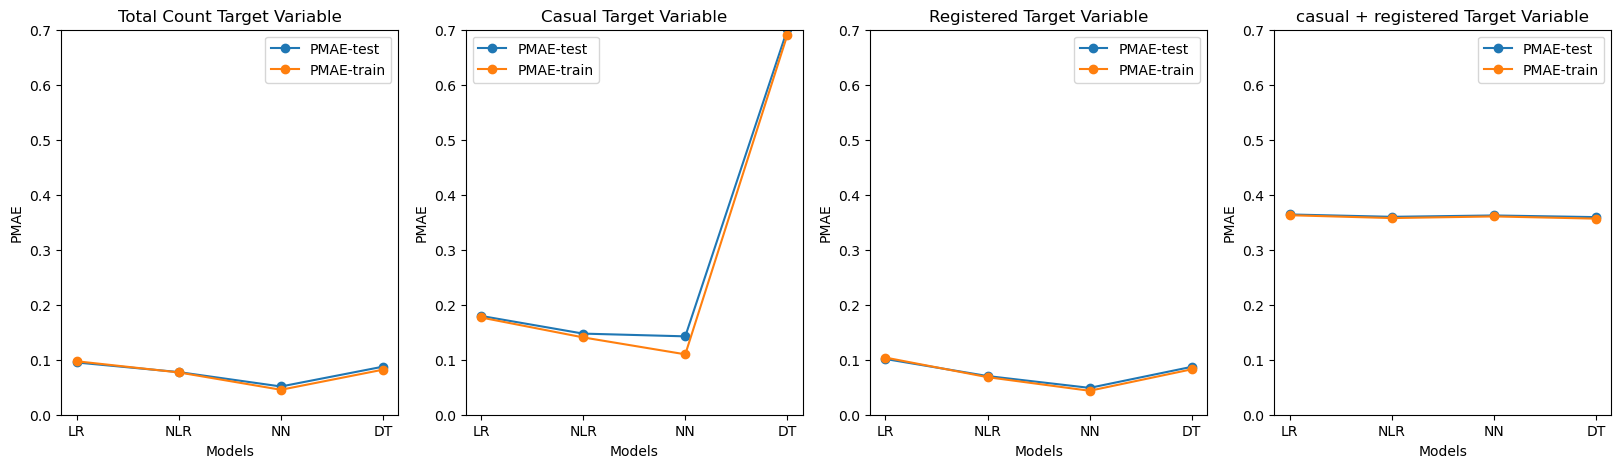

In [160]:
# visualize PMAE values on train and test datasets for the models on the three target variables
model_list=['LR','NLR','NN','DT']
targets=['Total Count','Casual','Registered','casual + registered']
plt.subplots(1, len(targets), figsize=(20, 5))
i=1 # index for subplot
j=0 # index to extract data for each target variable
for column in targets:
    plt.subplot(1, len(targets), i)
    plt.plot(range(len(model_list)), model_comp['PMAE on test'][j:j+4], label='PMAE-test', marker='o')
    plt.plot(range(len(model_list)), model_comp['PMAE on train'][j:j+4], label='PMAE-train', marker='o')
    plt.xticks(range(len(model_list)), model_list)  # Use integer indexing for x-axis ticks
    plt.xlabel("Models")
    plt.ylabel("PMAE")
    plt.ylim([0, 0.7])
    plt.title(f"{column} Target Variable")
    plt.legend()
    i += 1
    j=j+4
plt.show()  

Finding:

- Closeness of PMAE values for train and test datasets indicates that the models are robust and generalize well to unseen data.
- The Neural Network (NN) model demonstrates superior performance by achieving the lowest PMAE values across different the three target variables. This suggests its effectiveness in making accurate predictions.
- Following the NN model, the Non-Linear Regression (NLR) model performs well in predicting the three target variables—casual users, registered users, and total count.
- In specific cases, the Decision Tree (DT) model struggles in predicting casual users accurately, making it the least effective model for this category. On the other hand, Linear Regression (LR) performs least effectively in predicting registered users and the total count.
- Higher values os PMAE for combined count of casual and registered users indicates the approach of employing separate models for predicting casual and registered users and then summing them up yields lower performance compared to directly predicting the total count.

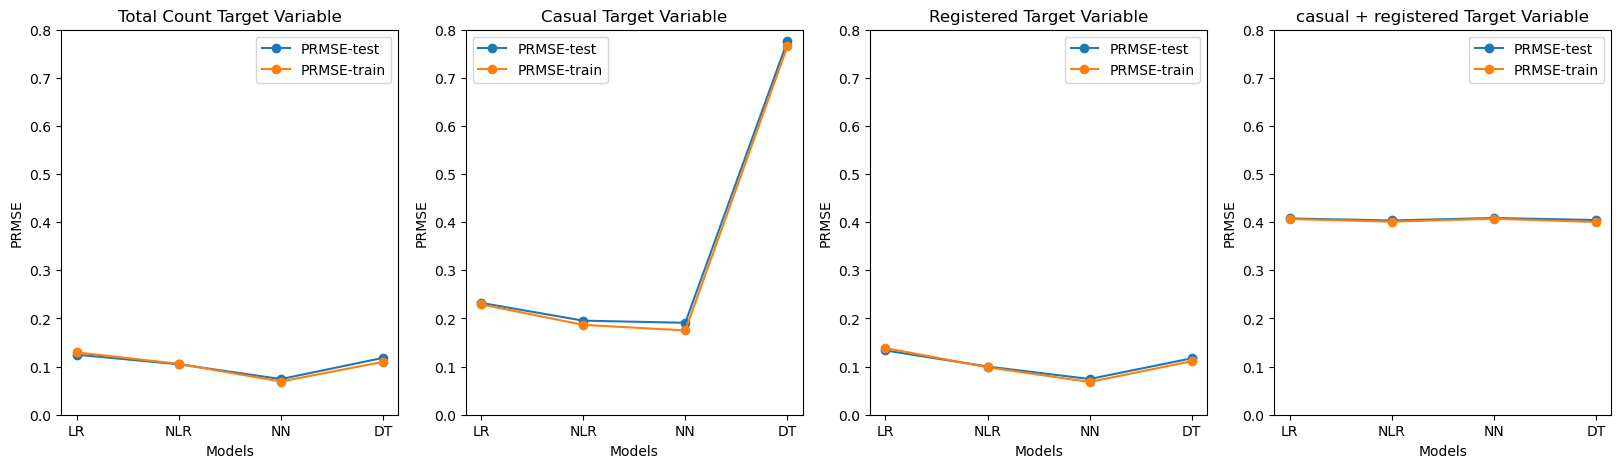

<Figure size 640x480 with 0 Axes>

In [400]:
# visualize PRMSE values on train and test datasets for the models on the three target variables
model_list=['LR','NLR','NN','DT']
targets=['Total Count','Casual','Registered','casual + registered']
plt.subplots(1, len(targets), figsize=(20, 5))
i=1 # index for subplot
j=0 # index to extract data for each target variable
for column in targets:
    plt.subplot(1, len(targets), i)
    plt.plot(range(len(model_list)), model_comp['PRMSE on test'][j:j+4], label='PRMSE-test', marker='o')
    plt.plot(range(len(model_list)), model_comp['PRMSE on train'][j:j+4], label='PRMSE-train', marker='o')
    plt.xticks(range(len(model_list)), model_list)  # Use integer indexing for x-axis ticks
    plt.xlabel("Models")
    plt.ylabel("PRMSE")
    plt.title(f"{column} Target Variable")
    plt.ylim([0, 0.8])
    plt.legend()
    i += 1
    j=j+4
plt.show()  
plt.savefig('C:/Users/HP/Desktop/brainstation/projects/Capstone/Sprint 2/RMSE_plots.png')

The insights of these plots are exactly alighned with those obtained from previous one (considering PMAE).

### Part 8: Recap:  

### 8-1: Insights on EDA
- The columns 'month' and 'season' exhibit a strong positive correlation.
- 'temp' and 'atemp' are highly correlated.
- The columns 'registered', 'cnt', and 'casual' show a high positive correlation with each other.
- The variables 'casual', 'registered', and 'cnt' demonstrate a notably strong right-skewed distribution.
- It is evident that the average number of bikes rented by casual users is lower than that of registered users over the two years.
- The analysis indicates a noticeable increase in the number of registered bike rentals from the year 2011 to 2012. However, the increase in casual rentals over the same period is relatively small.
- For both casual and registered users, the average number of bike rentals is higher during the spring and summer seasons compared to the winter and fall seasons.
- The analysis indicates that, on average, the number of rental bikes during the first and last months of the year is lower compared to the other months for both casual and registered users.
- In general, the average number of rental bikes for registered users surpasses that of casual users.
- It is evident that at the beginning and end of the week, the average number of rentals is higher compared to the middle of the week. However, the opposite behavior is observed for registered users. 
- For casual users, the average number of rentals is lower on working days than on non-working days. However, the opposite behavior is observed for registered users. 
- The mean number of rentals for both casual and registered users, as well as the 'cnt' variable, shows a decreasing trend as the values of weather situations increase.
- All the columns are significantly correlated with the three types of rental bikes (casual/registered/cnt).


### 8-2: Insights on Data Modeling

The models are evaluated using various metrics such as PMAE, PRMSE, R-squared, and Adjusted R-squared.

**Models Comparison for Total Count Target Variable:**
- The Neural Network stands out as the best performer for predicting the "total count" of bike rentals. It achieves the lowest PMAE and PRMSE values, indicating its ability to make accurate predictions.
- The R-squared and Adjusted R-squared values are also high, around 0.95, which means that the model explains a significant portion of the variance in the "total count."
- This suggests that the Neural Network captures the complex relationships between predictors and the total bike rental count effectively, making it a strong choice for this target variable.

**Models Comparison for Casual Rentals Target Variable:**
- Both Non Linear Regression and Neural Network models perform well for predicting "casual" rentals. They achieve lower PMAE and PRMSE values compared to other models.
- The R-squared values for these models are also relatively high (0.885 on average), indicating their good fit to the data.
- The Decision Tree model performs less effectively, with higher PMAE and PRMSE values. This might suggest that the relationship between predictors and "casual" rentals is not well captured by simple tree-based models.

**Models Comparison for Registered Rentals Target Variable:**
- Similar behaviour can be seen for total count and registered users rentals.
- The Neural Network clearly outperforms other models for predicting "registered" rentals. It achieves the lowest PMAE and PRMSE values, indicating its superior accuracy.
- The R-squared value for the Neural Network is notably high (around 0.95), indicating its strong ability to explain the variance in "registered" rentals.
- The Non Linear Regression model also performs well, but the Neural Network demonstrates a clear advantage in accuracy and prediction.
- The Linear Regression model performs less effectively, with higher PMAE and PRMSE values.

**Models Comparison for Combined (Casual + Registered) Rentals:**

- Comparing the PMAE and PRMSE values for the combined version with those for the total count target variable reveals that the approach of employing separate models for predicting casual and registered users and then summing them up yields lower performance compared to directly predicting the total count.

**Overall**
- In summary, our findings indicate that the Neural Network consistently excels across the three target variables, exhibiting the lowest PMAE and PRMSE values, as well as the highest R-squared and Adjusted R-squared values. The Non Linear Regression model is a strong contender, often ranking second in terms of performance. The Decision Tree and Linear Regression models showcases competitive results, although it tends to be outperformed by the Neural Network and Non Linear Regression models.
- Taking into account the evaluation metrics, it appears that the performance of the models in predicting the Combined (Casual + Registered) Rentals is not as strong. This is evident from the fact that the PMAE and PRMSE values for all four models are higher when compared to the models predicting the total count target variable directly.
- Values of R-squared and Adjusted R-squared across models and target variables stay very close, which indicates we do not have overfitting in terms of model complexity. These metrics reflect how well the models fit the data, and the similarity between the R-squared and Adjusted R-squared values suggests that the models are not capturing noise or random variations in the training data. This is a positive indication that the models are not overly complex and are generalizing well to unseen data.
- PMAE and PRMSE values for test and train datasets exhibit a remarkable similarity for almost all models and target variables. However, in a certain case, applying Neural Network model to predict Casual rentals, the PMAE and PRMSE values for the train dataset are noticeably lower than those for the test dataset. This discrepancy suggests overfitting. 